# Load Data

In [41]:
import pandas as pd
xls = pd.ExcelFile('/home/ggnicolau/Documents/4.MY_PROJECTS/relocate_employees/data/case people analytics (2).xlsx')
df_scores = pd.read_excel(xls, 0)
df_performance = pd.read_excel(xls, 1)
df_area = pd.read_excel(xls, 2)

In [42]:
display(df_scores.dtypes)
display(df_performance.dtypes)
display(df_area.dtypes)

Nome                                    object
Sobrenome                               object
E-mail                                  object
CPF                                     object
Match                                  float64
Potencial Bruto                        float64
Raciocínio                             float64
Social                                 float64
Motivacional                           float64
Cultura pontuação                      float64
Cultura classificação                   object
atributo-Capacidade analítica          float64
atributo-Pensamento conceitual         float64
atributo-Reflexão                      float64
atributo-Pensamento criativo           float64
atributo-Planejamento e organização    float64
atributo-Comunicação                   float64
atributo-Consideração pelos outros     float64
atributo-Influência                    float64
atributo-Sociabilidade                 float64
atributo-Facilitação                   float64
atributo-Flex

CPF                     object
Performance 1º/2019    float64
Performance 2º/2018    float64
Performance 1º/2018    float64
Performance 2º 2017    float64
dtype: object

CPF     object
Área    object
dtype: object

# Empregados por área

In [43]:
# Merge area and performance
df_perf_area_full = df_performance.merge(df_area, on='CPF', how='left')
df_perf_area_full = df_perf_area.rename(columns = {'Performance 1º/2019':'performance_1s_2019', 'Performance 2º/2018':'performance_2s_2018', 'Performance 1º/2018':'performance_1s_2018', 'Performance 2º 2017':'performance_2s_2017'})

In [44]:
df_perf_area

,CPF,performance_1s_2019,performance_2s_2018,performance_1s_2018,performance_2s_2017,Área
0,678.042.935-18,3.0,2.0,2.0,3.0,Operações
1,089.324.175-12,2.0,2.0,2.0,2.0,Logística
2,587.416.093-11,2.0,2.0,2.0,2.0,Financeiro
3,375.410.982-13,3.0,2.0,3.0,3.0,Operações
4,652.134.809-42,1.0,2.0,1.0,3.0,Pessoas
...,...,...,...,...,...,...
2355,375.149.286-18,2.0,1.0,NaN,NaN,Comercial
2356,053.679.481-21,3.0,2.0,NaN,NaN,Operações
2357,106.492.573-16,1.0,2.0,NaN,NaN,Logística
2358,964.051.273-71,3.0,2.0,NaN,NaN,Operações


In [45]:
# find new employees
novos_funcionarios = df_perf_area[df_perf_area[['performance_1s_2019', 'performance_2s_2018', 'performance_1s_2018', 'performance_2s_2017']].isna().all(axis=1)]
novos_funcionarios = novos_funcionarios[['CPF', 'Área']]
# drop rows with new employees in all performance columns
df_perf_area = df_perf_area_full[~df_perf_area_full[['performance_1s_2019', 'performance_2s_2018', 'performance_1s_2018', 'performance_2s_2017']].isna().all(axis=1)]
#df_perf_area = df_perf_area.rename(columns = {'performance_1s_2019':'performance_1s_2019', 'performance_2s_2018':'performance_2s_2018', 'Performance 1º/2018':'performance_1s_2018', 'Performance 2º 2017':'Performance_2s_2017'})
df_perf_area

,CPF,performance_1s_2019,performance_2s_2018,performance_1s_2018,performance_2s_2017,Área
0,678.042.935-18,3.0,2.0,2.0,3.0,Operações
1,089.324.175-12,2.0,2.0,2.0,2.0,Logística
2,587.416.093-11,2.0,2.0,2.0,2.0,Financeiro
3,375.410.982-13,3.0,2.0,3.0,3.0,Operações
4,652.134.809-42,1.0,2.0,1.0,3.0,Pessoas
...,...,...,...,...,...,...
2355,375.149.286-18,2.0,1.0,NaN,NaN,Comercial
2356,053.679.481-21,3.0,2.0,NaN,NaN,Operações
2357,106.492.573-16,1.0,2.0,NaN,NaN,Logística
2358,964.051.273-71,3.0,2.0,NaN,NaN,Operações


In [46]:
df_perf_area['Área'].value_counts()

Operações     630
Comercial     591
Logística     240
Financeiro     84
Pessoas        72
Name: Área, dtype: int64

OBSERVAÇÃO: Passaram 1617 funcionários na empresa até então

In [47]:
df_perf_area['Área'].value_counts()

Operações     630
Comercial     591
Logística     240
Financeiro     84
Pessoas        72
Name: Área, dtype: int64

In [48]:
operações = df_perf_area.loc[df_perf_area['Área'] == 'Operações']
comercial = df_perf_area.loc[df_perf_area['Área'] == 'Comercial']
logistica = df_perf_area.loc[df_perf_area['Área'] == 'Logística']
financeiro = df_perf_area.loc[df_perf_area['Área'] == 'Financeiro']
pessoas = df_perf_area.loc[df_perf_area['Área'] == 'Pessoas']

In [49]:
# Check missing values
import numpy as np
import pandas as pd


def missing_zero_values_table(df):
    zero_val = (df == 0.00).astype(int).sum(axis=0)
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
    mz_table = mz_table.rename(
        columns={0: 'Zero Values', 1: 'Missing Values', 2: '% of Total Values'})
    mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + \
        mz_table['Missing Values']
    mz_table['% Total Zero Missing Values'] = 100 * \
        mz_table['Total Zero Missing Values'] / len(df)
    mz_table['Data Type'] = df.dtypes
    mz_table = mz_table[
        mz_table.iloc[:, 1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
    print("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"
          "There are " + str(mz_table.shape[0]) +
          " columns that have missing values.")
#         mz_table.to_excel('D:/sampledata/missing_and_zero_values.xlsx', freeze_panes=(1,0), index = False)
    return mz_table

In [50]:
df_perf_area

,CPF,performance_1s_2019,performance_2s_2018,performance_1s_2018,performance_2s_2017,Área
0,678.042.935-18,3.0,2.0,2.0,3.0,Operações
1,089.324.175-12,2.0,2.0,2.0,2.0,Logística
2,587.416.093-11,2.0,2.0,2.0,2.0,Financeiro
3,375.410.982-13,3.0,2.0,3.0,3.0,Operações
4,652.134.809-42,1.0,2.0,1.0,3.0,Pessoas
...,...,...,...,...,...,...
2355,375.149.286-18,2.0,1.0,NaN,NaN,Comercial
2356,053.679.481-21,3.0,2.0,NaN,NaN,Operações
2357,106.492.573-16,1.0,2.0,NaN,NaN,Logística
2358,964.051.273-71,3.0,2.0,NaN,NaN,Operações


In [51]:
display(missing_zero_values_table(df_perf_area))
display(df_perf_area['performance_2s_2017'].isna().sum())
display(df_perf_area['performance_1s_2018'].isna().sum())
display(df_perf_area['performance_2s_2018'].isna().sum())
display(df_perf_area['performance_1s_2019'].isna().sum())

Your selected dataframe has 6 columns and 1617 Rows.
There are 4 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
performance_2s_2017,0,1264,78.2,1264,78.2,float64
performance_1s_2018,0,629,38.9,629,38.9,float64
performance_1s_2019,0,70,4.3,70,4.3,float64
performance_2s_2018,0,40,2.5,40,2.5,float64


1264

629

40

70

In [52]:
print('OPERAÇÕES:'), display(missing_zero_values_table(operações))
print('COMERCIAL:'), display(missing_zero_values_table(comercial))
print('LOGISTICA:'), display(missing_zero_values_table(logistica))
print('FINANCEIRO:'), display(missing_zero_values_table(financeiro))
print('PESSOAS:'), display(missing_zero_values_table(pessoas))

OPERAÇÕES:
Your selected dataframe has 6 columns and 630 Rows.
There are 4 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
performance_2s_2017,0,551,87.5,551,87.5,float64
performance_1s_2018,0,223,35.4,223,35.4,float64
performance_1s_2019,0,19,3.0,19,3.0,float64
performance_2s_2018,0,15,2.4,15,2.4,float64


COMERCIAL:
Your selected dataframe has 6 columns and 591 Rows.
There are 4 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
performance_2s_2017,0,528,89.3,528,89.3,float64
performance_1s_2018,0,227,38.4,227,38.4,float64
performance_1s_2019,0,14,2.4,14,2.4,float64
performance_2s_2018,0,8,1.4,8,1.4,float64


LOGISTICA:
Your selected dataframe has 6 columns and 240 Rows.
There are 4 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
performance_2s_2017,0,171,71.2,171,71.2,float64
performance_1s_2018,0,167,69.6,167,69.6,float64
performance_1s_2019,0,9,3.8,9,3.8,float64
performance_2s_2018,0,4,1.7,4,1.7,float64


FINANCEIRO:
Your selected dataframe has 6 columns and 84 Rows.
There are 4 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
performance_1s_2019,0,16,19.0,16,19.0,float64
performance_2s_2018,0,7,8.3,7,8.3,float64
performance_1s_2018,0,7,8.3,7,8.3,float64
performance_2s_2017,0,5,6.0,5,6.0,float64


PESSOAS:
Your selected dataframe has 6 columns and 72 Rows.
There are 4 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
performance_1s_2019,0,12,16.7,12,16.7,float64
performance_2s_2017,0,9,12.5,9,12.5,float64
performance_2s_2018,0,6,8.3,6,8.3,float64
performance_1s_2018,0,5,6.9,5,6.9,float64


(None, None)

In [53]:
# Count rows that are notnull to get employees count per period
o_df = operações.loc[:, operações.columns != 'Área'].notnull(
).sum().to_frame().T
o_df.insert(1, 'area', 'operações')

c_df = comercial.loc[:, comercial.columns != 'Área'].notnull(
).sum().to_frame().T
c_df.insert(1, 'area', 'comercial')

l_df = logistica.loc[:, logistica.columns != 'Área'].notnull().sum().to_frame().T
l_df.insert(1, 'area', 'logistica')

f_df = financeiro.loc[:, financeiro.columns != 'Área'].notnull().sum().to_frame().T
f_df.insert(1, 'area', 'financeira')

p_df = pessoas.loc[:, pessoas.columns != 'Área'].notnull().sum().to_frame().T
p_df.insert(1, 'area', 'pessoas')

In [54]:
frames = [o_df, c_df, l_df, f_df, p_df]

for frame in frames:
    frame.rename(columns = {'CPF':'empregados_acumulados'}, inplace = True)
    #frame[['area', 'performance_2s_2017', 'performance_1s_2018', 'performance_2s_2018', 'performance_1s_2019', 'empregados_acumulados']]
        
df_final = pd.concat(frames)
df_final = df_final[['area', 'performance_2s_2017', 'performance_1s_2018', 'performance_2s_2018', 'performance_1s_2019', 'empregados_acumulados']]
df_final['demissões'] = df_final['empregados_acumulados'] - df_final['performance_1s_2019']
df_final['tx_demissões'] = (df_final['demissões'] / df_final['empregados_acumulados']) *100
df_final

,area,performance_2s_2017,performance_1s_2018,performance_2s_2018,performance_1s_2019,empregados_acumulados,demissões,tx_demissões
0,operações,79,407,615,611,630,19,3.015873
0,comercial,63,364,583,577,591,14,2.368866
0,logistica,69,73,236,231,240,9,3.750000
0,financeira,79,77,77,68,84,16,19.047619
0,pessoas,63,67,66,60,72,12,16.666667


In [55]:
df_final['area'] = df_final.area.replace({'operações': 'operations', 'logistica': 'logistics', 'financeira': 'financial', 'pessoas': 'people'})
df_final

,area,performance_2s_2017,performance_1s_2018,performance_2s_2018,performance_1s_2019,empregados_acumulados,demissões,tx_demissões
0,operations,79,407,615,611,630,19,3.015873
0,comercial,63,364,583,577,591,14,2.368866
0,logistics,69,73,236,231,240,9,3.750000
0,financial,79,77,77,68,84,16,19.047619
0,people,63,67,66,60,72,12,16.666667


In [56]:
cols = list(df_final.columns.values)
print(cols)

['area', 'performance_2s_2017', 'performance_1s_2018', 'performance_2s_2018', 'performance_1s_2019', 'empregados_acumulados', 'demissões', 'tx_demissões']


In [57]:
perc = [f'{i/df_final["performance_2s_2017"].sum()*100:5.2f}%' for i in df_final['performance_2s_2017']]
df_final['lbl_2s_2017'] = [f'{el[1]}' for el in zip(df_final['area'], perc)]

perc = [f'{i/df_final["performance_1s_2018"].sum()*100:5.2f}%' for i in df_final['performance_1s_2018']]
df_final['lbl_1s_2018'] = [f'{el[1]}' for el in zip(df_final['area'], perc)]

perc = [f'{i/df_final["performance_2s_2018"].sum()*100:5.2f}%' for i in df_final['performance_2s_2018']]
df_final['lbl_2s_2018'] = [f'{el[1]}' for el in zip(df_final['area'], perc)]

perc = [f'{i/df_final["performance_1s_2019"].sum()*100:5.2f}%' for i in df_final['performance_1s_2019']]
df_final['lbl_1s_2019'] = [f'{el[1]}' for el in zip(df_final['area'], perc)]

df_final = df_final[['area', 'performance_2s_2017', 'lbl_2s_2017', 'performance_1s_2018', 'lbl_1s_2018', 'performance_2s_2018', 'lbl_2s_2018', 'performance_1s_2019', 'lbl_1s_2019', 'empregados_acumulados', 'demissões', 'tx_demissões']]

In [58]:
df_final

,area,performance_2s_2017,lbl_2s_2017,performance_1s_2018,lbl_1s_2018,performance_2s_2018,lbl_2s_2018,performance_1s_2019,lbl_1s_2019,empregados_acumulados,demissões,tx_demissões
0,operations,79,22.38%,407,41.19%,615,39.00%,611,39.50%,630,19,3.015873
0,comercial,63,17.85%,364,36.84%,583,36.97%,577,37.30%,591,14,2.368866
0,logistics,69,19.55%,73,7.39%,236,14.97%,231,14.93%,240,9,3.750000
0,financial,79,22.38%,77,7.79%,77,4.88%,68,4.40%,84,16,19.047619
0,people,63,17.85%,67,6.78%,66,4.19%,60,3.88%,72,12,16.666667


/tmp/ipykernel_484101/738735049.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



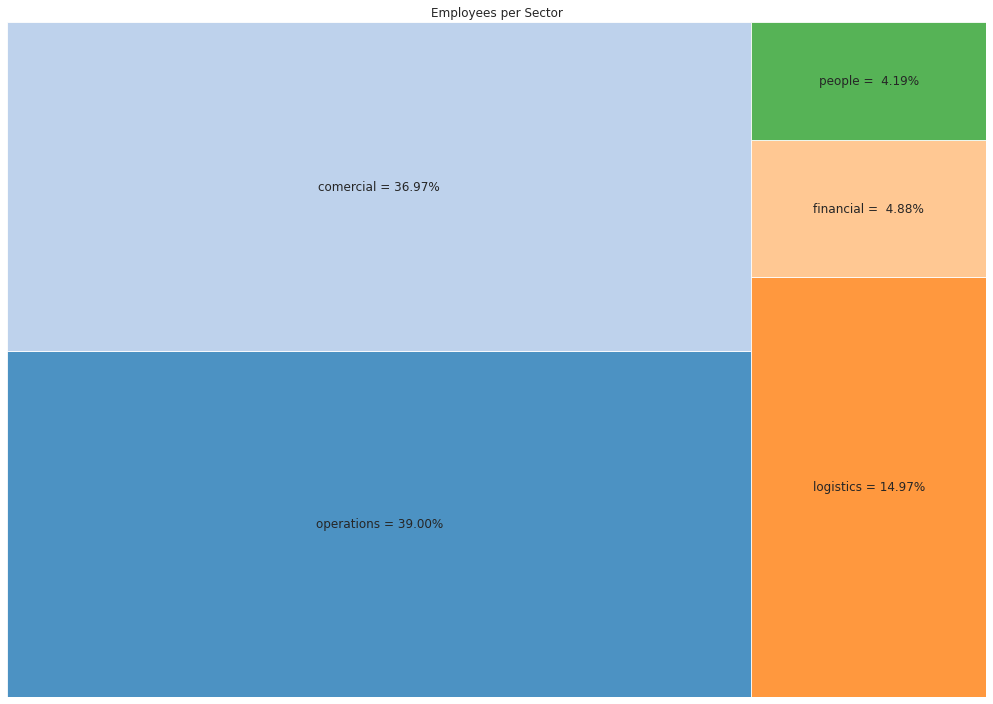

In [59]:
import squarify
import seaborn as sns
from matplotlib import pyplot as plt

perc = [f'{i/df_final["performance_2s_2018"].sum()*100:5.2f}%' for i in df_final['performance_2s_2018']]
df_final['lbl_2018'] = [f'{el[0]} = {el[1]}' for el in zip(df_final['area'], perc)]
size = 1.5
sns.set(rc={'figure.figsize':(size*(11.7),size*(8.27))})
sns.set_style(style="whitegrid") # set seaborn plot style
sizes= df_final["performance_2s_2018"].values# proportions of the categories
label= df_final['lbl_2018']
squarify.plot(sizes=sizes, label=label, alpha=0.8, color=sns.color_palette("tab20", len(sizes))).set(title='Employees per Sector')
plt.axis('off')
plt.savefig('funcionários_por_setor.png', bbox_inches='tight')
plt.show()

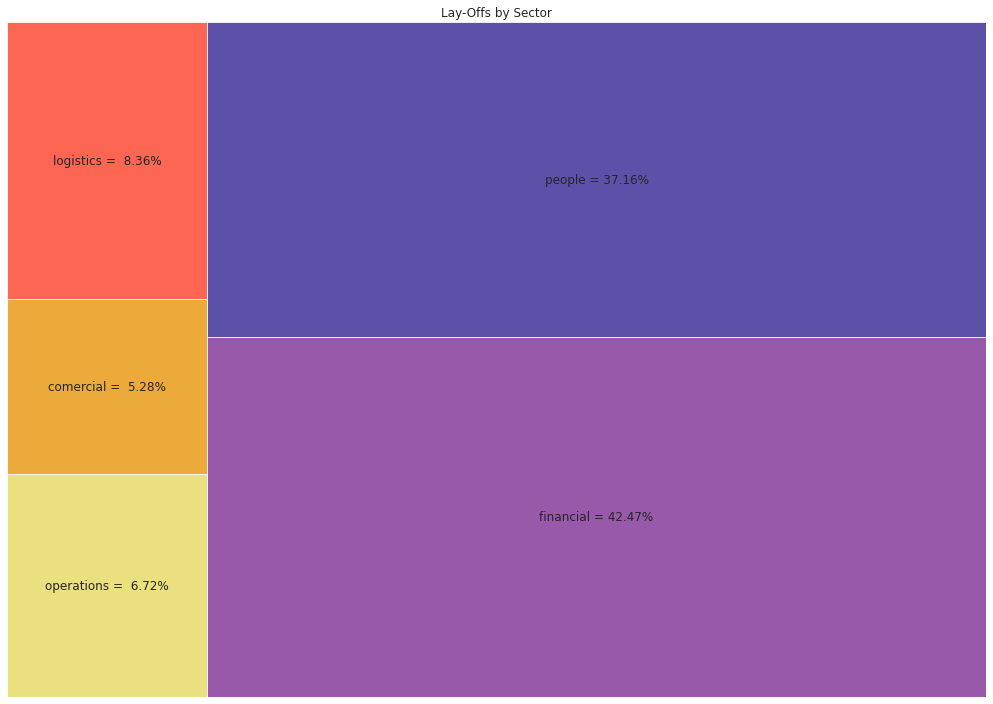

In [29]:
perc = [f'{i/df_final["tx_demissões"].sum()*100:5.2f}%' for i in df_final['tx_demissões']]
lbl = [f'{el[0]} = {el[1]}' for el in zip(df_final['area'], perc)]
size = 1.5
sns.set(rc={'figure.figsize':(size*(11.7),size*(8.27))})
sns.set_style(style="whitegrid") # set seaborn plot style
sizes= df_final["tx_demissões"].values# proportions of the categories
label=lbl
squarify.plot(sizes=sizes, label=label, alpha=0.8, color=sns.color_palette("CMRmap_r", len(sizes))).set(title='Lay-Offs by Sector')
plt.axis('off')
plt.savefig('demissões_por_setor.png', bbox_inches='tight')
plt.show()

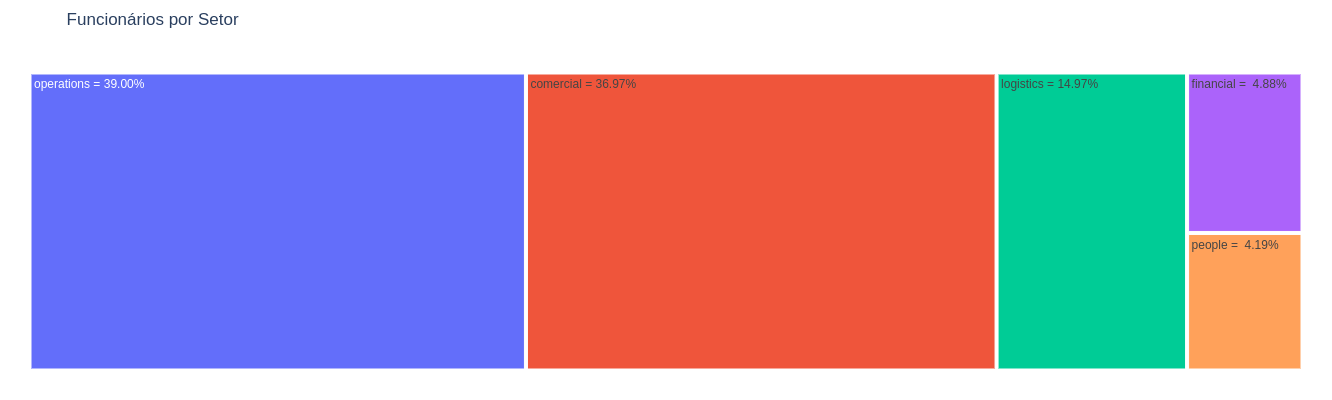

In [60]:
import plotly.express as px
fig = px.treemap(df_final, path=['lbl_2018'],values='performance_2s_2018', width=800, height=400, title = 'Funcionários por Setor')
fig.update_layout(
    #treemapcolorway = colors, #defines the colors in the treemap
    margin = dict(t=50, l=25, r=25, b=25))
fig.show()

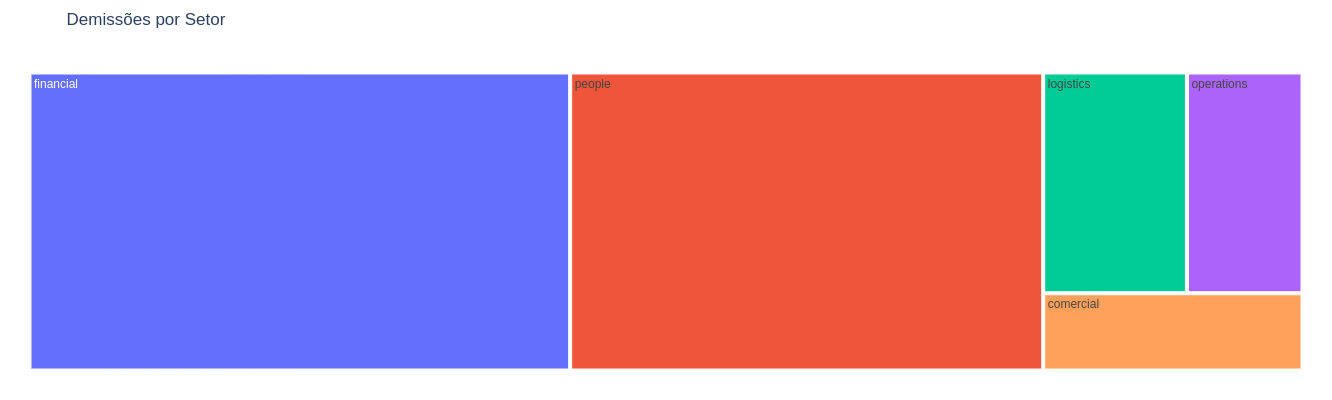

In [61]:
import plotly.express as px
fig = px.treemap(df_final, path=['area'],values='tx_demissões', width=800, height=400, title = 'Demissões por Setor')
fig.update_layout(
    #treemapcolorway = colors, #defines the colors in the treemap
    margin = dict(t=50, l=25, r=25, b=25))
fig.show()

In [62]:
o = operações.loc[:, operações.columns != 'Área'].notnull(
).sum().to_frame().T.loc[0, :].values.tolist()
c = comercial.loc[:, comercial.columns != 'Área'].notnull(
).sum().to_frame().T.loc[0, :].values.tolist()
l = logistica.loc[:, logistica.columns != 'Área'].notnull().sum().to_frame().T.loc[0, :].values.tolist()
f = financeiro.loc[:, financeiro.columns != 'Área'].notnull().sum().to_frame().T.loc[0, :].values.tolist()
p = pessoas.loc[:, pessoas.columns != 'Área'].notnull().sum().to_frame().T.loc[0, :].values.tolist()

reverse_list = [o, c,l,f,p]

for i in reverse_list:
    i.reverse()

,Period,Operations,Comercial,Logistics,Financial,People
0,2º 2017,79,63,69,79,63
1,1º 2018,407,364,73,77,67
2,2º 2018,615,583,236,77,66
3,1º 2019,611,577,231,68,60
4,Total_CPFs,630,591,240,84,72


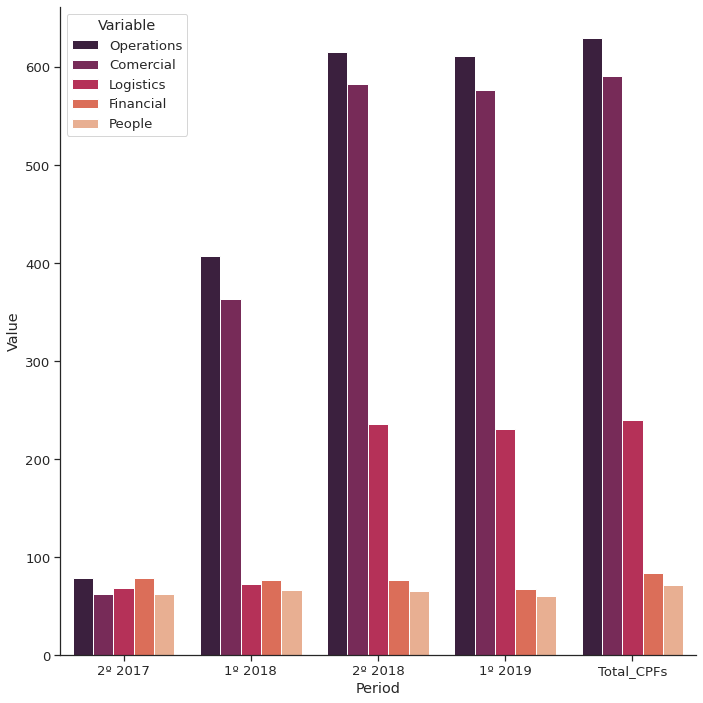

In [63]:
# Get absolute value number of employees per period

import seaborn as sns
from matplotlib import pyplot as plt
df = pd.DataFrame({
    'Period': ['2º 2017', '1º 2018', '2º 2018', '1º 2019', 'Total_CPFs'],
    'Operations': o,    
    'Comercial': c,
    'Logistics': l,
    'Financial': f,
    'People': p
})

df.to_csv("funcionários_por_setor.csv", sep = "\t", index = False)

display(df)

sns.set(style='ticks', context='notebook', font_scale=1.2)
fig, ax1 = plt.subplots(figsize=(10, 10))
tidy = df.melt(id_vars='Period').rename(columns=str.title)
sns.barplot(x='Period', y='Value', hue='Variable', palette="rocket",
                data=tidy, ax=ax1, capsize=.1)  # estimator=lambda x: sum(x==0)*100.0/len(x)
sns.despine(fig, top=True, right=True)
plt.tight_layout()
plt.savefig('funcionários_por_setor_por_período.png', bbox_inches='tight')
plt.show()

In [64]:
def get_change(current, previous):
    if current == previous:
        return 0
    try:
        return ((float(current) - previous) / previous) * 100.0
        # return (abs(current - previous) / previous) * 100.0 # uncomment if you wan't absolute values
    
    except ZeroDivisionError:
        return float('inf')

# def get_change(current, previous):
#     if current == previous:
#         return 0
#     try:
#         return ((float(current)-previous) / previous) * 100.0
#     except ZeroDivisionError:
#         return float('inf')

# setor_list = [c,l,f,p]
# c_growth = []
# l_growth = []
# f_growth = []
# p_growth = []
# growth_list = [c_growth, l_growth, f_growth, p_growth]

# for i in setor_list:
#     for w in growth_list:
#         #w = []
#         w.append(get_change(i[1], i[0]))
#         w.append(get_change(i[2], i[1]))
#         w.append(get_change(i[3], i[2]))
#         w.append(get_change(i[4], i[3]))

# reverse_list = [c_growth,l_growth,f_growth,p_growth]

# for i in reverse_list:
#     i.reverse()
setor_list = [o, c,l,f,p]

o_growth = []
o_growth.append(get_change(o[1], o[0]))
o_growth.append(get_change(o[2], o[1]))
o_growth.append(get_change(o[3], o[2]))
o_growth.append(get_change(o[3], o[0]))

c_growth = []
c_growth.append(get_change(c[1], c[0]))
c_growth.append(get_change(c[2], c[1]))
c_growth.append(get_change(c[3], c[2]))
c_growth.append(get_change(c[3], c[0]))

l_growth = []
l_growth.append(get_change(l[1], l[0]))
l_growth.append(get_change(l[2], l[1]))
l_growth.append(get_change(l[3], l[2]))
l_growth.append(get_change(l[3], l[0]))

f_growth = []
f_growth.append(get_change(f[1], f[0]))
f_growth.append(get_change(f[2], f[1]))
f_growth.append(get_change(f[3], f[2]))
f_growth.append(get_change(f[3], f[0]))

p_growth = []
p_growth.append(get_change(p[1], p[0]))
p_growth.append(get_change(p[2], p[1]))
p_growth.append(get_change(p[3], p[2]))
p_growth.append(get_change(p[3], p[0]))

,Period,Operations_growth,Comercial_growth,Logistic_growth,Financial_growth,People_growth
0,2º semestre,415.189873,477.777778,5.797101,-2.531646,6.349206
1,3º semestre,51.105651,60.164835,223.287671,0.000000,-1.492537
2,4º semestre,-0.650407,-1.029160,-2.118644,-11.688312,-9.090909


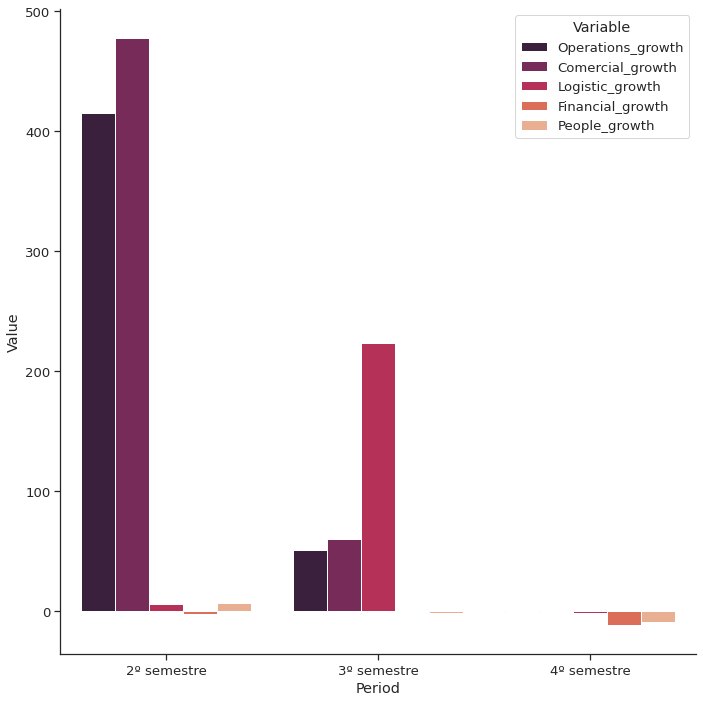

In [65]:
# Get percentage growth of employees per period
import seaborn as sns
from matplotlib import pyplot as plt
df = pd.DataFrame({
    'Period': ['2º semestre', '3º semestre', '4º semestre'],
    'Operations_growth': o_growth[ : -1],
    'Comercial_growth': c_growth[ : -1],
    'Logistic_growth': l_growth[ : -1],
    'Financial_growth': f_growth[ : -1],
    'People_growth': p_growth[ : -1]
})

display(df)

sns.set(style='ticks', context='notebook', font_scale=1.2)
fig, ax1 = plt.subplots(figsize=(10, 10))
tidy = df.melt(id_vars='Period').rename(columns=str.title)
sns.barplot(x='Period', y='Value', hue='Variable', palette="rocket",
            data=tidy, ax=ax1, capsize=.1)  # estimator=lambda x: sum(x==0)*100.0/len(x)
sns.despine(fig, top=True, right=True)
plt.tight_layout()
plt.savefig('tx_contratação_por_setor_por_período.png', bbox_inches='tight')
plt.show()

,Sectors,Operations_growth,Comercial_growth,Logistic_growth,Financial_growth,People_growth
0,Cumulative_Total,673.417722,815.873016,234.782609,-13.924051,-4.761905


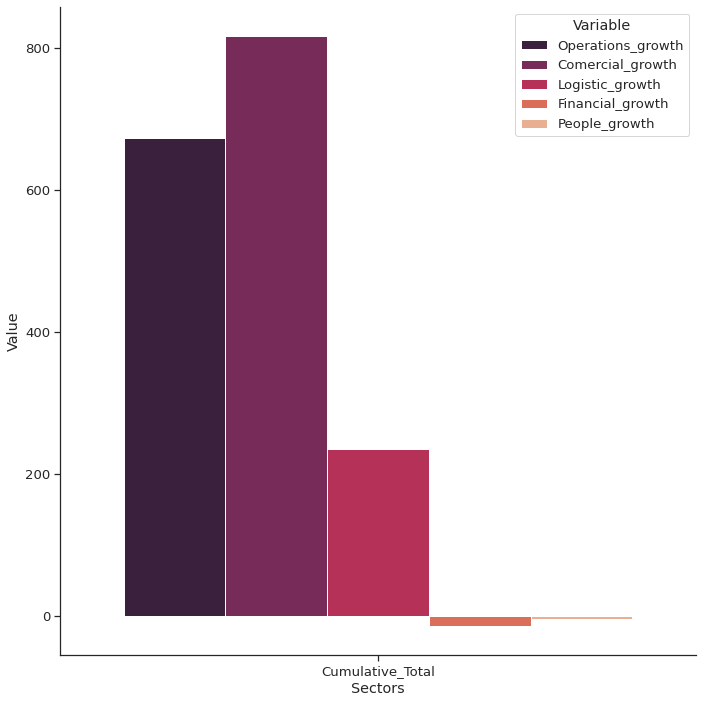

In [66]:
import seaborn as sns
from matplotlib import pyplot as plt
df = pd.DataFrame({
    'Sectors': ["Cumulative_Total"],
    'Operations_growth': o_growth[-1],
    'Comercial_growth': c_growth[-1],
    'Logistic_growth': l_growth[-1],
    'Financial_growth': f_growth[-1],
    'People_growth': p_growth[-1]
})

display(df)

sns.set(style='ticks', context='notebook', font_scale=1.2)
fig, ax1 = plt.subplots(figsize=(10, 10))
tidy = df.melt(id_vars='Sectors').rename(columns=str.title)
sns.barplot(x='Sectors', y='Value', hue='Variable', palette="rocket",
            data=tidy, ax=ax1, capsize=.1)  # estimator=lambda x: sum(x==0)*100.0/len(x)
sns.despine(fig, top=True, right=True)
plt.tight_layout()
plt.savefig('tx_contratação_acumulada_por_setor_por_período.png', bbox_inches='tight')
plt.show()

# Performance por área

In [67]:
comercial

,CPF,performance_1s_2019,performance_2s_2018,performance_1s_2018,performance_2s_2017,Área
25,583.106.279-12,1.0,2.0,1.0,3.0,Comercial
29,340.172.895-41,NaN,NaN,NaN,1.0,Comercial
32,973.450.281-61,2.0,2.0,1.0,2.0,Comercial
37,651.394.208-13,2.0,2.0,2.0,2.0,Comercial
42,267.531.904-14,2.0,2.0,3.0,2.0,Comercial
...,...,...,...,...,...,...
2347,521.647.983-17,2.0,3.0,NaN,NaN,Comercial
2351,802.651.734-26,3.0,2.0,NaN,NaN,Comercial
2352,130.265.987-12,1.0,3.0,NaN,NaN,Comercial
2353,071.548.693-48,3.0,1.0,NaN,NaN,Comercial


<AxesSubplot:title={'center':'Comercial'}, ylabel='Frequency'>

<AxesSubplot:title={'center':'Comercial'}, ylabel='Frequency'>

<AxesSubplot:title={'center':'Comercial'}, ylabel='Frequency'>

<AxesSubplot:title={'center':'Comercial'}, ylabel='Frequency'>

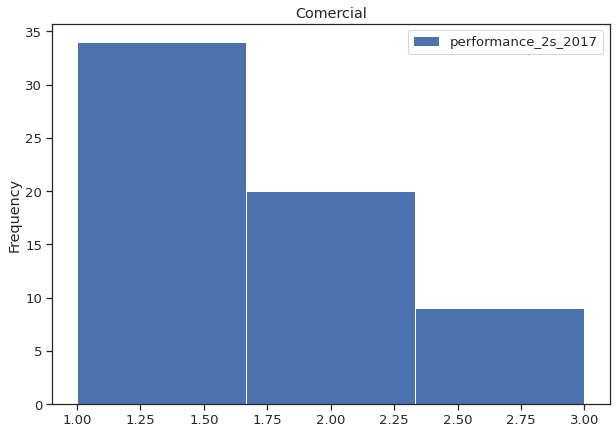

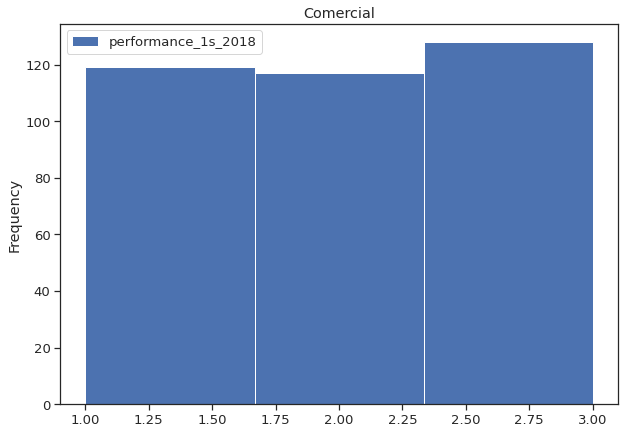

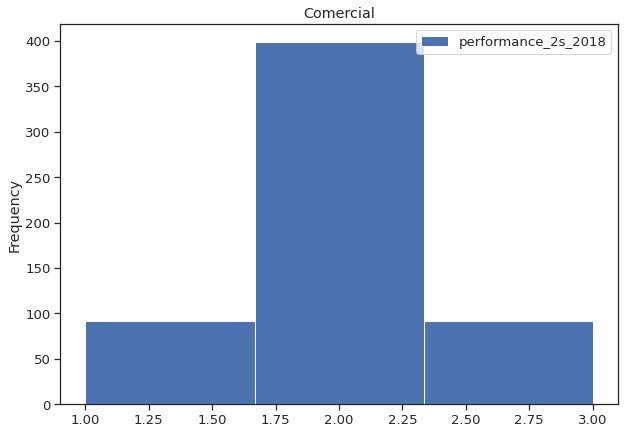

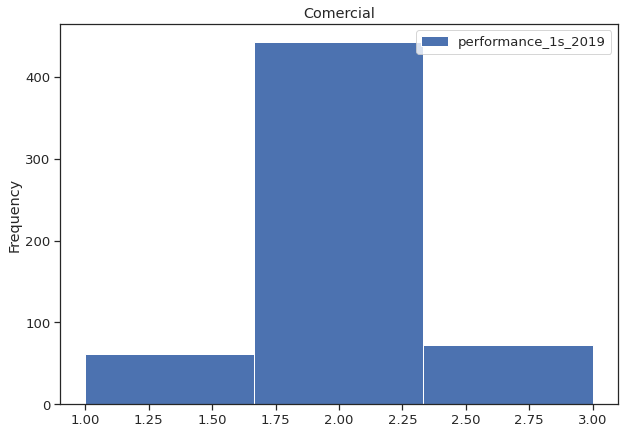

In [68]:
c_p2s_2017 = comercial[['CPF', 'performance_2s_2017', 'Área']].dropna()
c_p1s_2018 = comercial[['CPF', 'performance_1s_2018', 'Área']].dropna()
c_p2s_2018 = comercial[['CPF', 'performance_2s_2018', 'Área']].dropna()
c_p1s_2019 = comercial[['CPF', 'performance_1s_2019', 'Área']].dropna()

a = c_p2s_2017.plot.hist(bins=3, title = 'Comercial', figsize = (10, 7))
b = c_p1s_2018.plot.hist(bins=3, title = 'Comercial', figsize = (10, 7))
c = c_p2s_2018.plot.hist(bins=3, title = 'Comercial', figsize = (10, 7))
d = c_p1s_2019.plot.hist(bins=3, title = 'Comercial', figsize = (10, 7))

a.figure.savefig('c_p2s_2017.png')
b.figure.savefig('c_p1s_2018.png')
c.figure.savefig('c_p2s_2018.png')
d.figure.savefig('c_p1s_2019.png')

display(a)
display(b)
display(c)
display(d)

<AxesSubplot:title={'center':'Comercial'}>

<AxesSubplot:title={'center':'Comercial'}>

<AxesSubplot:title={'center':'Comercial'}>

<AxesSubplot:title={'center':'Comercial'}>

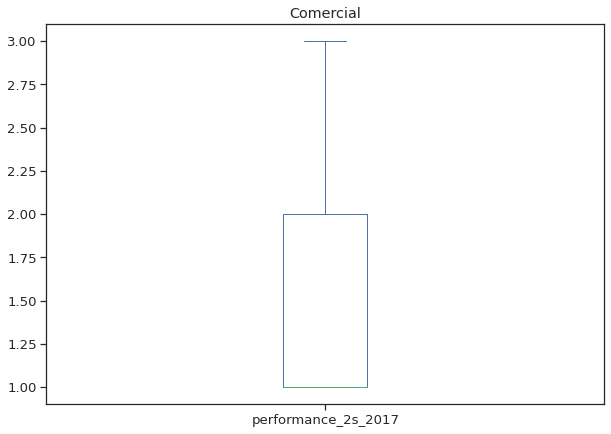

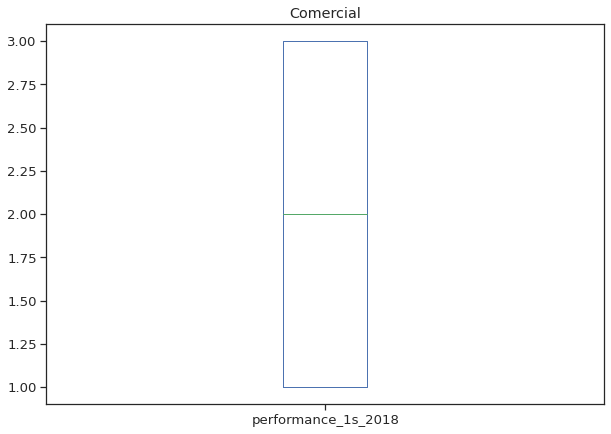

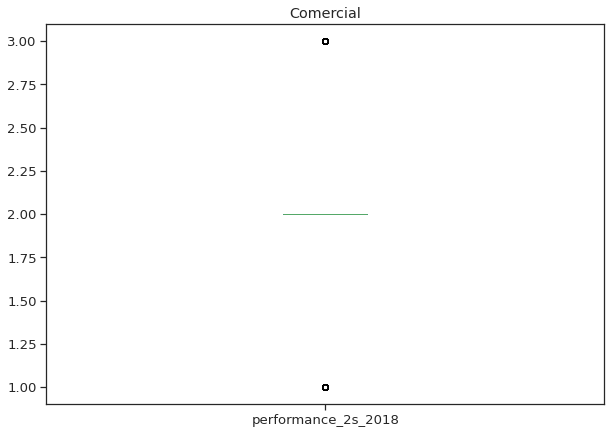

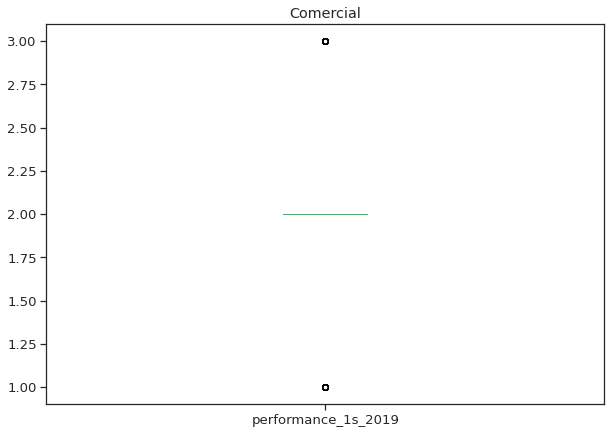

In [69]:
display(c_p2s_2017.plot.box(title = 'Comercial', figsize = (10, 7)))
display(c_p1s_2018.plot.box(title = 'Comercial', figsize = (10, 7)))
display(c_p2s_2018.plot.box(title = 'Comercial', figsize = (10, 7)))
display(c_p1s_2019.plot.box(title = 'Comercial', figsize = (10, 7)))

<AxesSubplot:title={'center':'Operations'}, ylabel='Frequency'>

<AxesSubplot:title={'center':'Operations'}, ylabel='Frequency'>

<AxesSubplot:title={'center':'Operations'}, ylabel='Frequency'>

<AxesSubplot:title={'center':'Operations'}, ylabel='Frequency'>

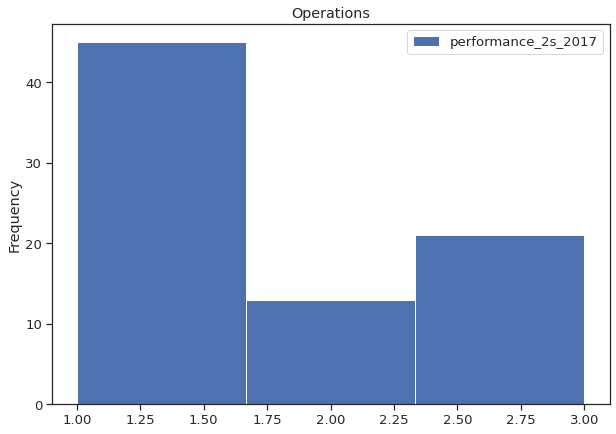

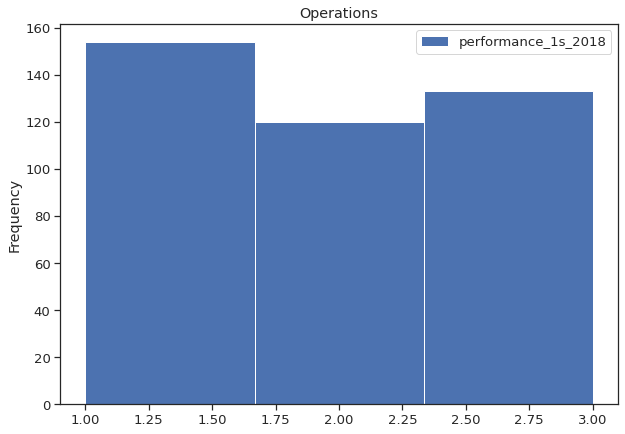

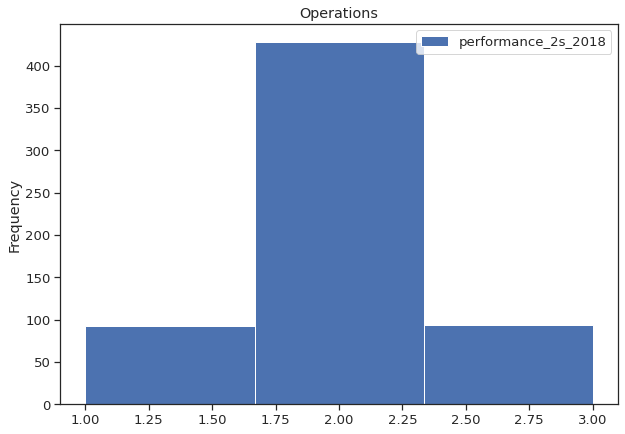

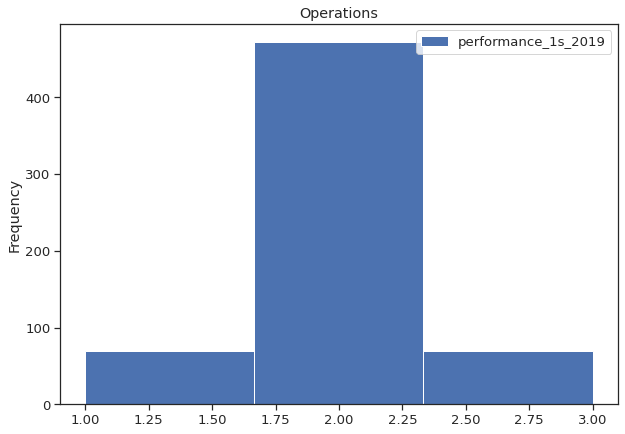

In [70]:
o_p2s_2017 = operações[['CPF', 'performance_2s_2017', 'Área']].dropna()
o_p1s_2018 = operações[['CPF', 'performance_1s_2018', 'Área']].dropna()
o_p2s_2018 = operações[['CPF', 'performance_2s_2018', 'Área']].dropna()
o_p1s_2019 = operações[['CPF', 'performance_1s_2019', 'Área']].dropna()

a = o_p2s_2017.plot.hist(bins=3, title = 'Operations', figsize = (10, 7))
b = o_p1s_2018.plot.hist(bins=3, title = 'Operations', figsize = (10, 7))
c = o_p2s_2018.plot.hist(bins=3, title = 'Operations', figsize = (10, 7))
d = o_p1s_2019.plot.hist(bins=3, title = 'Operations', figsize = (10, 7))

a.figure.savefig('o_p2s_2017.png')
b.figure.savefig('o_p1s_2018.png')
c.figure.savefig('o_p2s_2018.png')
d.figure.savefig('o_p1s_2019.png')

display(a)
display(b)
display(c)
display(d)

<AxesSubplot:title={'center':'Logistics'}, ylabel='Frequency'>

<AxesSubplot:title={'center':'Logistics'}, ylabel='Frequency'>

<AxesSubplot:title={'center':'Logistics'}, ylabel='Frequency'>

<AxesSubplot:title={'center':'Logistics'}, ylabel='Frequency'>

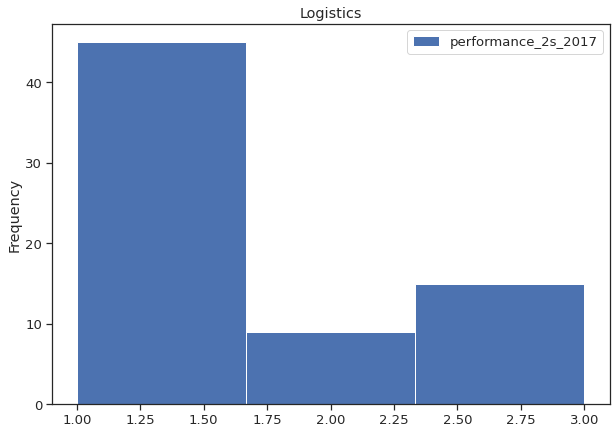

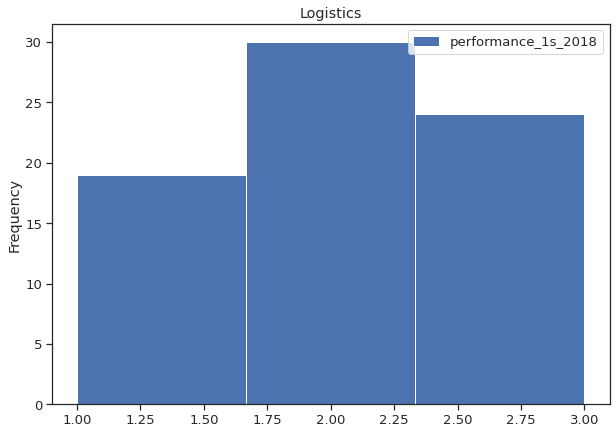

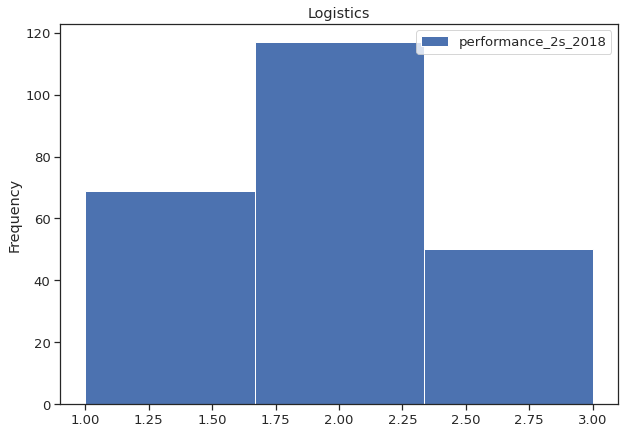

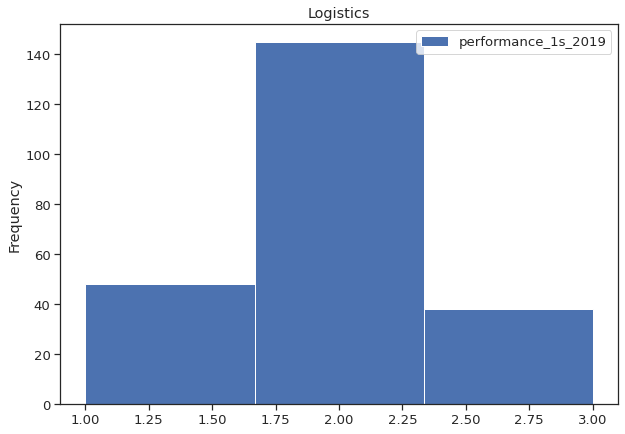

In [71]:
l_p2s_2017 = logistica[['CPF', 'performance_2s_2017', 'Área']].dropna()
l_p1s_2018 = logistica[['CPF', 'performance_1s_2018', 'Área']].dropna()
l_p2s_2018 = logistica[['CPF', 'performance_2s_2018', 'Área']].dropna()
l_p1s_2019 = logistica[['CPF', 'performance_1s_2019', 'Área']].dropna()

a = l_p2s_2017.plot.hist(bins=3, title = 'Logistics', figsize = (10, 7))
b = l_p1s_2018.plot.hist(bins=3, title = 'Logistics', figsize = (10, 7))
c = l_p2s_2018.plot.hist(bins=3, title = 'Logistics', figsize = (10, 7))
d = l_p1s_2019.plot.hist(bins=3, title = 'Logistics', figsize = (10, 7))

a.figure.savefig('l_p2s_2017.png')
b.figure.savefig('l_p1s_2018.png')
c.figure.savefig('l_p2s_2018.png')
d.figure.savefig('l_p1s_2019.png')

display(a)
display(b)
display(c)
display(d)

<AxesSubplot:title={'center':'Financial'}, ylabel='Frequency'>

<AxesSubplot:title={'center':'Financial'}, ylabel='Frequency'>

<AxesSubplot:title={'center':'Financial'}, ylabel='Frequency'>

<AxesSubplot:title={'center':'Financial'}, ylabel='Frequency'>

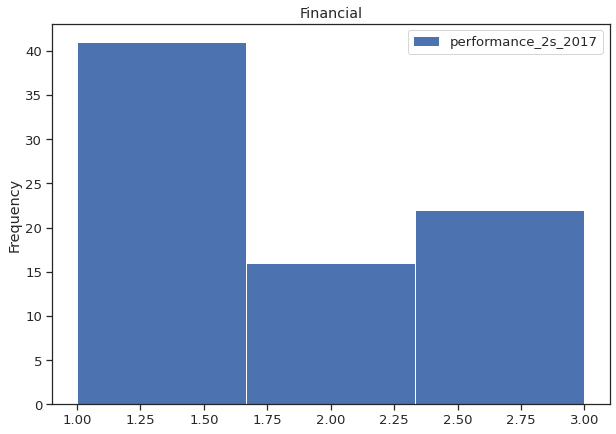

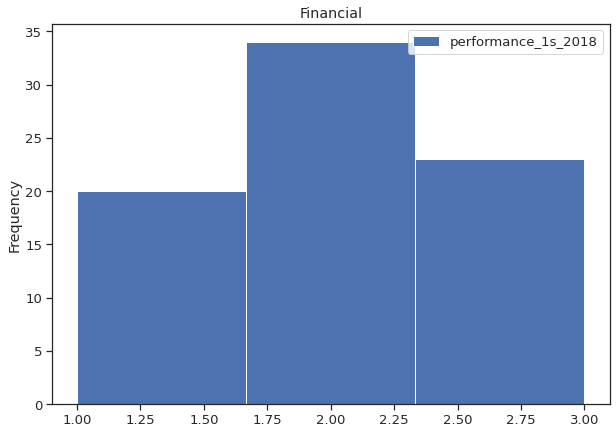

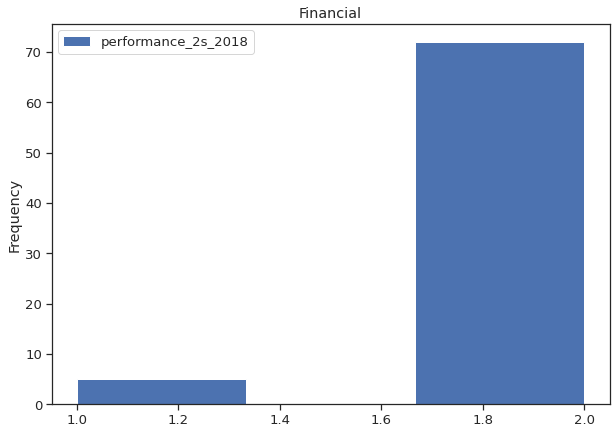

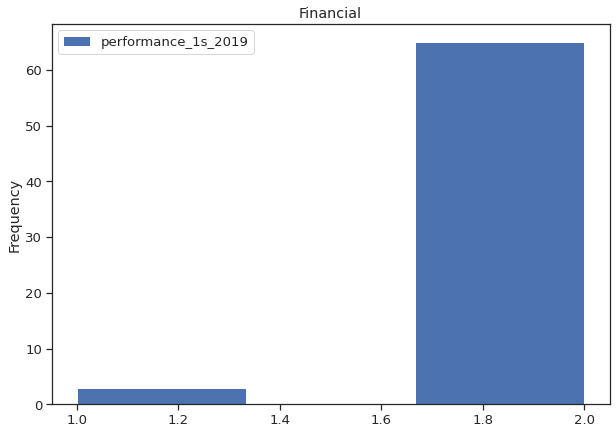

In [72]:
f_p2s_2017 = financeiro[['CPF', 'performance_2s_2017', 'Área']].dropna()
f_p1s_2018 = financeiro[['CPF', 'performance_1s_2018', 'Área']].dropna()
f_p2s_2018 = financeiro[['CPF', 'performance_2s_2018', 'Área']].dropna()
f_p1s_2019 = financeiro[['CPF', 'performance_1s_2019', 'Área']].dropna()

a = f_p2s_2017.plot.hist(bins=3, title = 'Financial', figsize = (10, 7))
b = f_p1s_2018.plot.hist(bins=3, title = 'Financial', figsize = (10, 7))
c = f_p2s_2018.plot.hist(bins=3, title = 'Financial', figsize = (10, 7))
d = f_p1s_2019.plot.hist(bins=3, title = 'Financial', figsize = (10, 7))

a.figure.savefig('f_p2s_2017.png')
b.figure.savefig('f_p1s_2018.png')
c.figure.savefig('f_p2s_2018.png')
d.figure.savefig('f_p1s_2019.png')

display(a)
display(b)
display(c)
display(d)

<AxesSubplot:title={'center':'People'}, ylabel='Frequency'>

<AxesSubplot:title={'center':'People'}, ylabel='Frequency'>

<AxesSubplot:title={'center':'People'}, ylabel='Frequency'>

<AxesSubplot:title={'center':'People'}, ylabel='Frequency'>

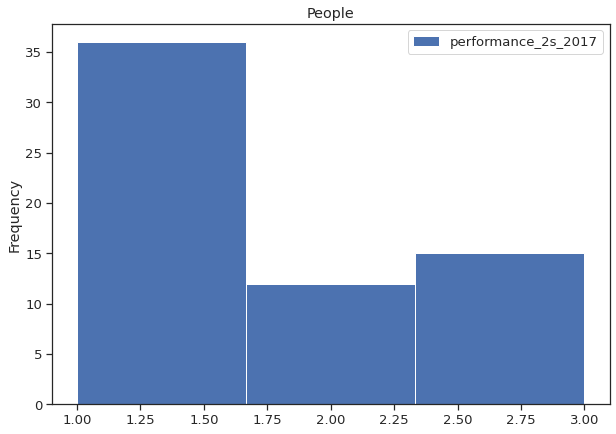

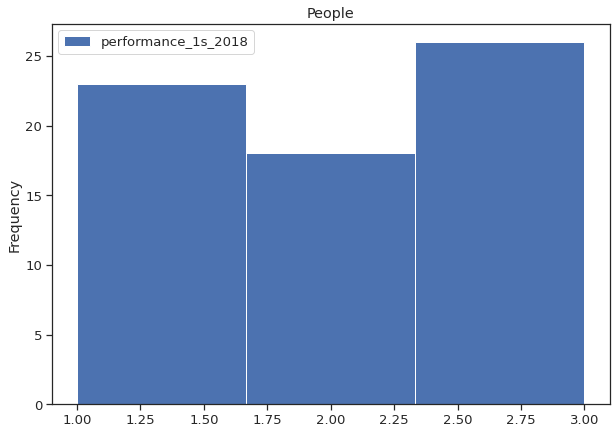

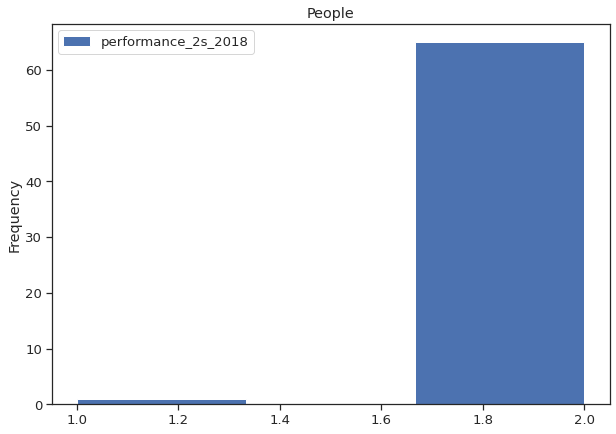

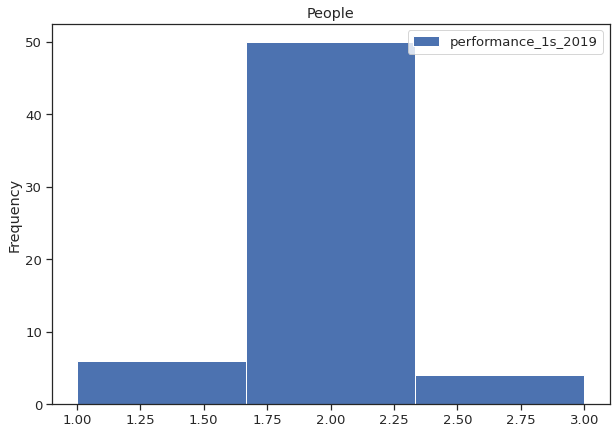

In [73]:
p_p2s_2017 = pessoas[['CPF', 'performance_2s_2017', 'Área']].dropna()
p_p1s_2018 = pessoas[['CPF', 'performance_1s_2018', 'Área']].dropna()
p_p2s_2018 = pessoas[['CPF', 'performance_2s_2018', 'Área']].dropna()
p_p1s_2019 = pessoas[['CPF', 'performance_1s_2019', 'Área']].dropna()

a = p_p2s_2017.plot.hist(bins=3, title = 'People', figsize = (10, 7))
b = p_p1s_2018.plot.hist(bins=3, title = 'People', figsize = (10, 7))
c = p_p2s_2018.plot.hist(bins=3, title = 'People', figsize = (10, 7))
d = p_p1s_2019.plot.hist(bins=3, title = 'People', figsize = (10, 7))

a.figure.savefig('p_p2s_2017.png')
b.figure.savefig('p_p1s_2018.png')
c.figure.savefig('p_p2s_2018.png')
d.figure.savefig('p_p1s_2019.png')

display(a)
display(b)
display(c)
display(d)

OBSERVAÇÃO: Muitas 

In [74]:
comercial.columns

Index(['CPF', 'performance_1s_2019', 'performance_2s_2018',
       'performance_1s_2018', 'performance_2s_2017', 'Área'],
      dtype='object')

In [75]:
cpf_operações.columns

NameError: name 'cpf_operações' is not defined

In [76]:
cpf_operações = operações['CPF']
cpf_comercial = comercial['CPF']
cpf_logistica = logistica['CPF']
cpf_financeiro = financeiro['CPF']
cpf_pessoas = pessoas['CPF']

cpf_operações = df_scores[df_scores['CPF'].isin(cpf_operações)].drop(['Match'], axis=1)
cpf_comercial = df_scores[df_scores['CPF'].isin(cpf_comercial)].drop(['Match'], axis=1)
cpf_logistica = df_scores[df_scores['CPF'].isin(cpf_logistica)].drop(['Match'], axis=1)
cpf_financeiro = cpf_financeiro = df_scores[df_scores['CPF'].isin(cpf_financeiro)].drop(['Match'], axis=1)
cpf_pessoas = df_scores[df_scores['CPF'].isin(cpf_pessoas)].drop(['Match'], axis=1)

cpf_operações =  cpf_operações.dropna().sort_values(by='Potencial Bruto', ascending=False)
cpf_comercial = cpf_comercial.dropna().sort_values(by='Potencial Bruto', ascending=False)
cpf_logistica = cpf_logistica.dropna().sort_values(by='Potencial Bruto', ascending=False)
cpf_financeiro = cpf_financeiro.dropna().sort_values(by='Potencial Bruto', ascending=False)
cpf_pessoas = cpf_pessoas.dropna().sort_values(by='Potencial Bruto', ascending=False)

In [77]:
from statistics import median
operações_Potencial_Bruto = median(cpf_operações['Potencial Bruto'])
display(print('operações_Potencial_Bruto:', operações_Potencial_Bruto))

operações_racional = median(cpf_operações['Raciocínio'])
display(print('operações_racional:', operações_racional))

operações_Social = median(cpf_operações['Social'])
display(print('operações_Social:', operações_Social))

operações_Motivacional = median(cpf_operações['Motivacional'])
display(print('operações_motivacional:', operações_Motivacional))

operações_Cultura = median(cpf_operações['Cultura pontuação'])
display(print('operações_Cultura:', operações_Cultura))

print(" ")
print(" ")

comercial_Potencial_Bruto = median(cpf_comercial['Potencial Bruto'])
display(print('comercial_Potencial_Bruto:', comercial_Potencial_Bruto))

comercial_racional = median(cpf_comercial['Raciocínio'])
display(print('comercial_racional:', comercial_racional))

comercial_Social = median(cpf_comercial['Social'])
display(print('comercial_Social:', comercial_Social))

comercial_Motivacional = median(cpf_comercial['Motivacional'])
display(print('comercial_motivacional:', comercial_Motivacional))

comercial_Cultura = median(cpf_comercial['Cultura pontuação'])
display(print('comercial_Cultura:', comercial_Cultura))

print(" ")
print(" ")

logistica_Potencial_Bruto = median(cpf_logistica['Potencial Bruto'])
display(print('logistica_Potencial_Bruto:', logistica_Potencial_Bruto))

logistica_racional = median(cpf_logistica['Raciocínio'])
display(print('logistica_racional:', logistica_racional))

logistica_Social = median(cpf_logistica['Social'])
display(print('logistica_Social:', logistica_Social))

logistica_Motivacional = median(cpf_logistica['Motivacional'])
display(print('logistica_motivacional:', logistica_Motivacional))

logistica_Cultura = median(cpf_logistica['Cultura pontuação'])
display(print('logistica_Cultura:', logistica_Cultura))

print(" ")
print(" ")

financeiro_Potencial_Bruto = median(cpf_financeiro['Potencial Bruto'])
display(print('financeiro_Potencial_Bruto:', financeiro_Potencial_Bruto))

financeiro_racional = median(cpf_financeiro['Raciocínio'])
display(print('financeiro_racional:', financeiro_racional))

financeiro_Social = median(cpf_financeiro['Social'])
display(print('financeiro_Social:', financeiro_Social))

financeiro_Motivacional = median(cpf_financeiro['Motivacional'])
display(print('financeiro_motivacional:', financeiro_Motivacional))

financeiro_Cultura = median(cpf_financeiro['Cultura pontuação'])
display(print('financeiro_Cultura:', financeiro_Cultura))

print(" ")
print(" ")

pessoas_Potencial_Bruto = median(cpf_pessoas['Potencial Bruto'])
display(print('pessoas_Potencial_Bruto:', pessoas_Potencial_Bruto))

pessoas_racional = median(cpf_pessoas['Raciocínio'])
display(print('pessoas_racional:', pessoas_racional))

pessoas_Social = median(cpf_pessoas['Social'])
display(print('pessoas_Social:', pessoas_Social))

pessoas_Motivacional = median(cpf_pessoas['Motivacional'])
display(print('pessoas_motivacional:', pessoas_Motivacional))

pessoas_Cultura = median(cpf_pessoas['Cultura pontuação'])
display(print('pessoas_Cultura:', pessoas_Cultura))

operações_Potencial_Bruto: 51.24


None

operações_racional: 49.565


None

operações_Social: 50.82


None

operações_motivacional: 51.56


None

operações_Cultura: 44.62


None

 
 
comercial_Potencial_Bruto: 50.47


None

comercial_racional: 55.79


None

comercial_Social: 47.53


None

comercial_motivacional: 51.56


None

comercial_Cultura: 42.03


None

 
 
logistica_Potencial_Bruto: 54.595


None

logistica_racional: 56.150000000000006


None

logistica_Social: 50.82


None

logistica_motivacional: 54.155


None

logistica_Cultura: 47.655


None

 
 
financeiro_Potencial_Bruto: 50.43


None

financeiro_racional: 52.67


None

financeiro_Social: 54.12


None

financeiro_motivacional: 51.56


None

financeiro_Cultura: 50.52


None

 
 
pessoas_Potencial_Bruto: 49.895


None

pessoas_racional: 53.394999999999996


None

pessoas_Social: 54.114999999999995


None

pessoas_motivacional: 51.56


None

pessoas_Cultura: 51.11


None

In [78]:
df_operações = pd.DataFrame({
    'Potencial_Bruto': operações_Potencial_Bruto,
    'Raciocínio': operações_racional,
    'Social': operações_Social,
    'Motivacional': operações_Motivacional,
    'Cultura': operações_Cultura,
    'Área': 'operações'
}, index=[0])


df_comercial = pd.DataFrame({
    'Potencial_Bruto': comercial_Potencial_Bruto,
    'Raciocínio': comercial_racional,
    'Social': comercial_Social,
    'Motivacional': comercial_Motivacional,
    'Cultura': comercial_Cultura,
    'Área': 'comercial'
}, index=[0])

df_logistica = pd.DataFrame({
    'Potencial_Bruto': logistica_Potencial_Bruto,
    'Raciocínio': logistica_racional,
    'Social': logistica_Social,
    'Motivacional': logistica_Motivacional,
    'Cultura': logistica_Cultura,
    'Área': 'logistica'
}, index=[0])

df_financeiro = pd.DataFrame({
    'Potencial_Bruto': financeiro_Potencial_Bruto,
    'Raciocínio': financeiro_racional,
    'Social': financeiro_Social,
    'Motivacional': financeiro_Motivacional,
    'Cultura': financeiro_Cultura,
    'Área': 'financeiro'
}, index=[0])

df_pessoas = pd.DataFrame({
    'Potencial_Bruto': pessoas_Potencial_Bruto,
    'Raciocínio': pessoas_racional,
    'Social': pessoas_Social,
    'Motivacional': pessoas_Motivacional,
    'Cultura': pessoas_Cultura,
    'Área': 'pessoas'
}, index=[0])

In [79]:
frames = [df_operações, df_comercial, df_logistica, df_financeiro, df_pessoas]

df_median_full = pd.concat(frames)
df_median_full = df_median_full.T
df_median_full.columns = ['operações', 'comercial', 'logistica', 'financeiro', 'pessoas']

df_median_full = df_median_full.T
#df_median_full = df_median_full.drop(df_median_full.tail(1).index)
df_median_full = df_median_full.reset_index()
df_median_full = df_median_full.rename(columns = {'index':'Área'})
df_median_full = df_median_full.iloc[: , :-1]
#df_median_full = df_median_full.iloc[: , 1:]
df_median_full.to_csv('median_skills.csv', sep= '\t', index = False)

In [80]:
df_median_full

,Área,Potencial_Bruto,Raciocínio,Social,Motivacional,Cultura
0,operações,51.24,49.565,50.82,51.56,44.62
1,comercial,50.47,55.79,47.53,51.56,42.03
2,logistica,54.595,56.15,50.82,54.155,47.655
3,financeiro,50.43,52.67,54.12,51.56,50.52
4,pessoas,49.895,53.395,54.115,51.56,51.11


In [81]:
operações_good = operações[(operações["performance_1s_2019"]==3) & (operações["performance_2s_2018"]==3)]
operações_good = operações_good.reset_index(drop = True)

comercial_good = comercial[(comercial["performance_1s_2019"]==3) & (comercial["performance_2s_2018"]==3)]
comercial_good = comercial_good.reset_index(drop = True)

logistica_good = logistica[(logistica["performance_1s_2019"]==3) & (logistica["performance_2s_2018"]==3)]
logistica_good = logistica_good.reset_index(drop = True)

financeiro_good = financeiro[(financeiro["performance_1s_2019"]==3) & (financeiro["performance_2s_2018"]==3)]
financeiro_good = financeiro_good.reset_index(drop = True)

pessoas_good = pessoas[(pessoas["performance_1s_2019"]==3) & (pessoas["performance_2s_2018"]==3)]
pessoas_good = pessoas_good.reset_index(drop = True)

cpf_operações_good = operações_good['CPF']
cpf_comercial_good = comercial_good['CPF']
cpf_logistica_good = logistica_good['CPF']
cpf_financeiro_good = financeiro_good['CPF']
cpf_pessoas_good = pessoas_good['CPF']

cpf_operações_good = df_scores[df_scores['CPF'].isin(cpf_operações_good)]
cpf_comercial_good = df_scores[df_scores['CPF'].isin(cpf_comercial_good)]
cpf_logistica_good = df_scores[df_scores['CPF'].isin(cpf_logistica_good)]
cpf_financeiro_good = cpf_financeiro_good = df_scores[df_scores['CPF'].isin(cpf_financeiro_good)]
cpf_pessoas_good = df_scores[df_scores['CPF'].isin(cpf_pessoas_good)]

cpf_operações_good = cpf_comercial_good.dropna(subset=['Potencial Bruto', 'Raciocínio','Social', 'Motivacional', 'Cultura pontuação'], how='all')
cpf_comercial_good = cpf_comercial_good.dropna(subset=['Potencial Bruto', 'Raciocínio','Social', 'Motivacional', 'Cultura pontuação'], how='all')
cpf_logistica_good = cpf_logistica_good.dropna(subset=['Potencial Bruto', 'Raciocínio','Social', 'Motivacional', 'Cultura pontuação'], how='all')
cpf_financeiro_good = cpf_financeiro_good.dropna(subset=['Potencial Bruto', 'Raciocínio','Social', 'Motivacional', 'Cultura pontuação'], how='all')
cpf_pessoas_good = cpf_pessoas_good.dropna(subset=['Potencial Bruto', 'Raciocínio','Social', 'Motivacional', 'Cultura pontuação'], how='all')

display(print('OPERAÇÕES:'), cpf_operações_good)
display(print('COMERCIAL:'), cpf_comercial_good)
display(print('LOGÍSTICA:'), cpf_logistica_good)
display(print('FINANCEIRO:'), cpf_financeiro_good)
display(print('PESSOAS:'), cpf_pessoas_good)

OPERAÇÕES:


None

,Nome,Sobrenome,E-mail,CPF,Match,Potencial Bruto,Raciocínio,Social,Motivacional,Cultura pontuação,...,Início - Raciocínio,Fim - Raciocínio,Início - Cultura,Fim - Cultura,Início - Social,Fim - Social,Início - Motivacional,Fim - Motivacional,Início - Perfil,Fim - Perfil
1070,Vitor Hugo,Moura,vitor-hugomoura741@example.com,368.547.021-35,NaN,NaN,26.52,NaN,NaN,43.64,...,2016-04-26 17:12:32.297368+00:00,2016-04-26 18:12:18.316810+00:00,2016-04-26 17:09:01.395097+00:00,2016-04-26 17:12:17.176754+00:00,NaN,NaN,NaN,NaN,NaN,NaN
1077,Otávio,da Costa,otavioda-costa3150@example.com,654.789.231-17,NaN,NaN,75.94,NaN,NaN,40.08,...,2016-04-26 17:32:44.981672+00:00,2016-04-26 18:27:05.786374+00:00,2016-04-26 18:27:33.164425+00:00,2016-04-26 18:33:40.150757+00:00,NaN,NaN,NaN,NaN,NaN,NaN
1085,Samuel,Oliveira,samueloliveira69@example.com,561.782.340-15,NaN,NaN,27.76,NaN,NaN,28.81,...,2016-04-26 18:22:13.368349+00:00,2016-04-26 19:19:50.204689+00:00,2016-04-26 19:21:36.140384+00:00,2016-04-26 19:28:27.772925+00:00,NaN,NaN,NaN,NaN,NaN,NaN
1145,Noah,Rodrigues,noahrodrigues4829@example.com,509.748.123-23,NaN,45.13,62.80,27.78,41.17,18.07,...,2016-09-27 21:52:16.286917+00:00,2016-09-27 22:39:31.597991+00:00,2016-09-27 21:47:44.797029+00:00,2016-09-27 21:52:03.930100+00:00,2016-09-25 23:44:24.750336+00:00,2016-09-25 23:57:58.773085+00:00,2016-09-25 23:25:27.328450+00:00,2016-09-25 23:43:47.624657+00:00,2016-09-25 23:09:55.696262+00:00,2016-09-25 23:23:23.272116+00:00
1374,Murilo,da Luz,muriloda-luz7566@example.com,340.819.256-15,NaN,26.97,10.89,27.78,51.56,27.14,...,2016-12-08 11:29:58.790446+00:00,2016-12-16 12:00:48.781100+00:00,2016-11-29 18:13:47.783268+00:00,2016-11-29 18:19:20.658337+00:00,2017-04-06 12:12:34.111495+00:00,2017-04-06 12:27:42.333945+00:00,2017-04-07 11:45:09.259001+00:00,2017-04-07 12:03:43.397757+00:00,2017-04-06 11:27:48.619083+00:00,2017-04-06 11:43:44.208552+00:00
1538,Elisa,Fogaça,elisafogaca3214@example.com,705.293.461-25,NaN,NaN,40.10,NaN,NaN,69.24,...,2016-05-12 03:32:36.737039+00:00,2016-05-12 04:35:26.251413+00:00,2016-05-11 17:00:45.454683+00:00,2016-05-11 17:07:10.559803+00:00,NaN,NaN,NaN,NaN,NaN,NaN
1784,Maria Eduarda,Mendes,maria-eduardamendes8885@example.com,638.049.157-11,NaN,NaN,61.51,NaN,NaN,24.43,...,2016-05-26 00:05:59.699115+00:00,2016-05-26 01:09:46.844586+00:00,2016-05-25 21:46:51.384200+00:00,2016-05-25 21:55:56.769283+00:00,NaN,NaN,NaN,NaN,NaN,NaN
3948,Marcelo,da Cruz,marceloda-cruz7260@example.com,715.390.846-39,NaN,53.65,59.22,37.65,67.14,30.09,...,2016-05-25 23:10:21.126912+00:00,2016-05-26 00:09:50.617727+00:00,2016-05-25 22:59:00.947632+00:00,2016-05-25 23:07:41.525327+00:00,2016-10-03 01:33:05.201539+00:00,2016-10-03 01:46:26.706692+00:00,2016-10-03 02:01:51.374246+00:00,2016-10-03 02:16:06.334062+00:00,2016-10-03 01:47:51.940459+00:00,2016-10-03 01:57:01.576019+00:00
3974,Ana Clara,Porto,ana-claraporto70@example.com,486.923.501-33,NaN,NaN,64.51,NaN,NaN,41.70,...,2016-05-19 01:49:32.274076+00:00,2016-05-19 02:39:05.027949+00:00,2016-05-19 02:39:28.751277+00:00,2016-05-19 02:48:43.134544+00:00,NaN,NaN,NaN,NaN,NaN,NaN
3978,Yago,Almeida,yagoalmeida7848@example.com,472.651.098-31,NaN,48.85,41.46,44.24,67.14,55.20,...,2017-02-22 17:47:48.859876+00:00,2017-02-22 18:43:30.495950+00:00,2017-02-22 17:36:45.404993+00:00,2017-02-22 17:42:41.518181+00:00,2016-09-10 15:46:11.612894+00:00,2016-09-10 15:58:02.969987+00:00,2016-09-17 19:30:01.254628+00:00,2016-09-17 19:48:15.782237+00:00,2016-09-10 01:32:25.679148+00:00,2016-09-10 01:45:25.781041+00:00


COMERCIAL:


None

,Nome,Sobrenome,E-mail,CPF,Match,Potencial Bruto,Raciocínio,Social,Motivacional,Cultura pontuação,...,Início - Raciocínio,Fim - Raciocínio,Início - Cultura,Fim - Cultura,Início - Social,Fim - Social,Início - Motivacional,Fim - Motivacional,Início - Perfil,Fim - Perfil
1070,Vitor Hugo,Moura,vitor-hugomoura741@example.com,368.547.021-35,NaN,NaN,26.52,NaN,NaN,43.64,...,2016-04-26 17:12:32.297368+00:00,2016-04-26 18:12:18.316810+00:00,2016-04-26 17:09:01.395097+00:00,2016-04-26 17:12:17.176754+00:00,NaN,NaN,NaN,NaN,NaN,NaN
1077,Otávio,da Costa,otavioda-costa3150@example.com,654.789.231-17,NaN,NaN,75.94,NaN,NaN,40.08,...,2016-04-26 17:32:44.981672+00:00,2016-04-26 18:27:05.786374+00:00,2016-04-26 18:27:33.164425+00:00,2016-04-26 18:33:40.150757+00:00,NaN,NaN,NaN,NaN,NaN,NaN
1085,Samuel,Oliveira,samueloliveira69@example.com,561.782.340-15,NaN,NaN,27.76,NaN,NaN,28.81,...,2016-04-26 18:22:13.368349+00:00,2016-04-26 19:19:50.204689+00:00,2016-04-26 19:21:36.140384+00:00,2016-04-26 19:28:27.772925+00:00,NaN,NaN,NaN,NaN,NaN,NaN
1145,Noah,Rodrigues,noahrodrigues4829@example.com,509.748.123-23,NaN,45.13,62.80,27.78,41.17,18.07,...,2016-09-27 21:52:16.286917+00:00,2016-09-27 22:39:31.597991+00:00,2016-09-27 21:47:44.797029+00:00,2016-09-27 21:52:03.930100+00:00,2016-09-25 23:44:24.750336+00:00,2016-09-25 23:57:58.773085+00:00,2016-09-25 23:25:27.328450+00:00,2016-09-25 23:43:47.624657+00:00,2016-09-25 23:09:55.696262+00:00,2016-09-25 23:23:23.272116+00:00
1374,Murilo,da Luz,muriloda-luz7566@example.com,340.819.256-15,NaN,26.97,10.89,27.78,51.56,27.14,...,2016-12-08 11:29:58.790446+00:00,2016-12-16 12:00:48.781100+00:00,2016-11-29 18:13:47.783268+00:00,2016-11-29 18:19:20.658337+00:00,2017-04-06 12:12:34.111495+00:00,2017-04-06 12:27:42.333945+00:00,2017-04-07 11:45:09.259001+00:00,2017-04-07 12:03:43.397757+00:00,2017-04-06 11:27:48.619083+00:00,2017-04-06 11:43:44.208552+00:00
1538,Elisa,Fogaça,elisafogaca3214@example.com,705.293.461-25,NaN,NaN,40.10,NaN,NaN,69.24,...,2016-05-12 03:32:36.737039+00:00,2016-05-12 04:35:26.251413+00:00,2016-05-11 17:00:45.454683+00:00,2016-05-11 17:07:10.559803+00:00,NaN,NaN,NaN,NaN,NaN,NaN
1784,Maria Eduarda,Mendes,maria-eduardamendes8885@example.com,638.049.157-11,NaN,NaN,61.51,NaN,NaN,24.43,...,2016-05-26 00:05:59.699115+00:00,2016-05-26 01:09:46.844586+00:00,2016-05-25 21:46:51.384200+00:00,2016-05-25 21:55:56.769283+00:00,NaN,NaN,NaN,NaN,NaN,NaN
3948,Marcelo,da Cruz,marceloda-cruz7260@example.com,715.390.846-39,NaN,53.65,59.22,37.65,67.14,30.09,...,2016-05-25 23:10:21.126912+00:00,2016-05-26 00:09:50.617727+00:00,2016-05-25 22:59:00.947632+00:00,2016-05-25 23:07:41.525327+00:00,2016-10-03 01:33:05.201539+00:00,2016-10-03 01:46:26.706692+00:00,2016-10-03 02:01:51.374246+00:00,2016-10-03 02:16:06.334062+00:00,2016-10-03 01:47:51.940459+00:00,2016-10-03 01:57:01.576019+00:00
3974,Ana Clara,Porto,ana-claraporto70@example.com,486.923.501-33,NaN,NaN,64.51,NaN,NaN,41.70,...,2016-05-19 01:49:32.274076+00:00,2016-05-19 02:39:05.027949+00:00,2016-05-19 02:39:28.751277+00:00,2016-05-19 02:48:43.134544+00:00,NaN,NaN,NaN,NaN,NaN,NaN
3978,Yago,Almeida,yagoalmeida7848@example.com,472.651.098-31,NaN,48.85,41.46,44.24,67.14,55.20,...,2017-02-22 17:47:48.859876+00:00,2017-02-22 18:43:30.495950+00:00,2017-02-22 17:36:45.404993+00:00,2017-02-22 17:42:41.518181+00:00,2016-09-10 15:46:11.612894+00:00,2016-09-10 15:58:02.969987+00:00,2016-09-17 19:30:01.254628+00:00,2016-09-17 19:48:15.782237+00:00,2016-09-10 01:32:25.679148+00:00,2016-09-10 01:45:25.781041+00:00


LOGÍSTICA:


None

,Nome,Sobrenome,E-mail,CPF,Match,Potencial Bruto,Raciocínio,Social,Motivacional,Cultura pontuação,...,Início - Raciocínio,Fim - Raciocínio,Início - Cultura,Fim - Cultura,Início - Social,Fim - Social,Início - Motivacional,Fim - Motivacional,Início - Perfil,Fim - Perfil
3865,Renan,Ribeiro,renanribeiro5361@example.com,921.605.478-67,NaN,NaN,77.14,NaN,NaN,34.28,...,2016-05-19 00:25:49.915271+00:00,2016-05-19 01:20:50.750937+00:00,2016-05-19 00:16:50.488780+00:00,2016-05-19 00:22:05.050253+00:00,NaN,NaN,NaN,NaN,NaN,NaN
3925,Melissa,Cavalcanti,melissacavalcanti447@example.com,125.649.780-11,NaN,NaN,59.15,NaN,NaN,23.62,...,2016-05-20 00:38:13.076775+00:00,2016-05-20 01:35:13.874933+00:00,2016-05-20 01:35:31.738918+00:00,2016-05-20 01:42:05.847397+00:00,NaN,NaN,NaN,NaN,NaN,NaN
4129,Maria Cecília,Fogaça,maria-ceciliafogaca2758@example.com,918.452.370-13,NaN,NaN,21.02,NaN,NaN,46.71,...,2016-05-19 16:38:00.264525+00:00,2016-05-19 20:06:00.275895+00:00,2016-05-19 16:06:49.709013+00:00,2016-05-19 16:37:47.547735+00:00,NaN,NaN,NaN,NaN,NaN,NaN
4173,Maria Clara,Pires,maria-clarapires6449@example.com,760.589.324-83,NaN,NaN,70.32,NaN,NaN,62.26,...,2016-05-20 20:22:59.571425+00:00,2016-05-20 21:17:37.815380+00:00,2016-05-20 20:17:16.821571+00:00,2016-05-20 20:21:37.680805+00:00,NaN,NaN,NaN,NaN,NaN,NaN
4177,Luiz Otávio,Oliveira,luiz-otaviooliveira3904@example.com,193.807.425-41,NaN,48.97,60.13,34.36,51.56,35.76,...,2017-09-12 01:05:34.674646+00:00,2017-09-12 02:08:11.838325+00:00,2017-09-12 02:23:25.216153+00:00,2017-09-12 02:29:55.706621+00:00,2017-09-12 00:48:23.754265+00:00,2017-09-12 01:05:02.404836+00:00,2017-09-11 20:06:34.916536+00:00,2017-09-11 20:26:23.693407+00:00,2017-09-11 19:53:40.860039+00:00,2017-09-11 20:04:14.029357+00:00
4228,Carlos Eduardo,da Mota,carlos-eduardoda-mota5122@example.com,263.947.158-91,NaN,NaN,35.52,NaN,NaN,43.34,...,2016-05-25 19:52:49.259829+00:00,2016-05-25 20:44:57.412386+00:00,2016-05-25 20:48:07.928945+00:00,2016-05-25 20:53:30.928178+00:00,NaN,NaN,NaN,NaN,NaN,NaN
4235,Juliana,Monteiro,julianamonteiro4529@example.com,623.058.149-33,NaN,NaN,72.52,NaN,NaN,50.55,...,2016-05-23 22:47:54.739816+00:00,2016-05-23 23:39:16.634939+00:00,2016-05-23 23:40:06.925977+00:00,2016-05-23 23:45:56.158025+00:00,NaN,NaN,NaN,NaN,NaN,NaN
4242,Heitor,Nogueira,heitornogueira3951@example.com,514.897.360-93,NaN,NaN,37.57,NaN,NaN,27.92,...,2016-05-24 01:18:11.955406+00:00,2016-05-24 02:24:19.661423+00:00,2016-05-24 02:59:34.591202+00:00,2016-05-24 03:06:00.563232+00:00,NaN,NaN,NaN,NaN,NaN,NaN
4248,Vitor Gabriel,Martins,vitor-gabrielmartins2630@example.com,732.841.965-28,NaN,NaN,35.74,NaN,NaN,27.40,...,2016-05-24 02:21:34.955613+00:00,2016-05-24 03:16:06.928860+00:00,2016-05-24 02:17:04.202035+00:00,2016-05-24 02:21:16.596707+00:00,NaN,NaN,NaN,NaN,NaN,NaN
4277,Noah,Gomes,noahgomes7502@example.com,912.036.847-11,NaN,NaN,53.97,NaN,NaN,16.27,...,2016-05-25 13:57:19.123609+00:00,2016-05-25 14:55:32.469363+00:00,2016-05-25 14:56:02.086701+00:00,2016-05-25 15:00:26.087092+00:00,NaN,NaN,NaN,NaN,NaN,NaN


FINANCEIRO:


None

,Nome,Sobrenome,E-mail,CPF,Match,Potencial Bruto,Raciocínio,Social,Motivacional,Cultura pontuação,...,Início - Raciocínio,Fim - Raciocínio,Início - Cultura,Fim - Cultura,Início - Social,Fim - Social,Início - Motivacional,Fim - Motivacional,Início - Perfil,Fim - Perfil


PESSOAS:


None

,Nome,Sobrenome,E-mail,CPF,Match,Potencial Bruto,Raciocínio,Social,Motivacional,Cultura pontuação,...,Início - Raciocínio,Fim - Raciocínio,Início - Cultura,Fim - Cultura,Início - Social,Fim - Social,Início - Motivacional,Fim - Motivacional,Início - Perfil,Fim - Perfil


In [82]:
operações_bad = operações[(operações["performance_1s_2019"]==1) & (operações["performance_2s_2018"]==1)]
operações_bad = operações_bad.reset_index(drop = True)

comercial_bad = comercial[(comercial["performance_1s_2019"]==1) & (comercial["performance_2s_2018"]==1)]
comercial_bad = comercial_bad.reset_index(drop = True)

logistica_bad = logistica[(logistica["performance_1s_2019"]==1) & (logistica["performance_2s_2018"]==1)]
logistica_bad = logistica_bad.reset_index(drop = True)

financeiro_bad = financeiro[(financeiro["performance_1s_2019"]==1) & (financeiro["performance_2s_2018"]==1)]
financeiro_bad = financeiro_bad.reset_index(drop = True)

pessoas_bad = pessoas[(pessoas["performance_1s_2019"]==1) & (pessoas["performance_2s_2018"]==1)]
pessoas_bad = pessoas_bad.reset_index(drop = True)

cpf_operações_bad = operações_bad['CPF']
cpf_comercial_bad = comercial_bad['CPF']
cpf_logistica_bad = logistica_bad['CPF']
cpf_financeiro_bad = financeiro_bad['CPF']
cpf_pessoas_bad = pessoas_bad['CPF']

cpf_operações_bad = df_scores[df_scores['CPF'].isin(cpf_operações_bad)]
cpf_comercial_bad = df_scores[df_scores['CPF'].isin(cpf_comercial_bad)]
cpf_logistica_bad = df_scores[df_scores['CPF'].isin(cpf_logistica_bad)]
cpf_financeiro_bad = cpf_financeiro_bad = df_scores[df_scores['CPF'].isin(cpf_financeiro_bad)]
cpf_pessoas_bad = df_scores[df_scores['CPF'].isin(cpf_pessoas_bad)]

cpf_operações_bad = cpf_comercial_bad.dropna(subset=['Potencial Bruto', 'Raciocínio','Social', 'Motivacional', 'Cultura pontuação'], how='all')
cpf_comercial_bad = cpf_comercial_bad.dropna(subset=['Potencial Bruto', 'Raciocínio','Social', 'Motivacional', 'Cultura pontuação'], how='all')
cpf_logistica_bad = cpf_logistica_bad.dropna(subset=['Potencial Bruto', 'Raciocínio','Social', 'Motivacional', 'Cultura pontuação'], how='all')
cpf_financeiro_bad = cpf_financeiro_bad.dropna(subset=['Potencial Bruto', 'Raciocínio','Social', 'Motivacional', 'Cultura pontuação'], how='all')
cpf_pessoas_bad = cpf_pessoas_bad.dropna(subset=['Potencial Bruto', 'Raciocínio','Social', 'Motivacional', 'Cultura pontuação'], how='all')

display(print('OPERAÇÕES:'), cpf_operações_bad)
display(print('COMERCIAL:'), cpf_comercial_bad)
display(print('LOGÍSTICA:'), cpf_logistica_bad)
display(print('FINANCEIRO:'), cpf_financeiro_bad)
display(print('PESSOAS:'), cpf_pessoas_bad)

OPERAÇÕES:


None

,Nome,Sobrenome,E-mail,CPF,Match,Potencial Bruto,Raciocínio,Social,Motivacional,Cultura pontuação,...,Início - Raciocínio,Fim - Raciocínio,Início - Cultura,Fim - Cultura,Início - Social,Fim - Social,Início - Motivacional,Fim - Motivacional,Início - Perfil,Fim - Perfil
1067,Maria Cecília,Porto,maria-ceciliaporto930@example.com,493.061.758-84,NaN,NaN,90.73,NaN,NaN,NaN,...,2016-04-26 21:39:51.846789+00:00,2016-04-26 22:45:25.607537+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1080,Luana,da Mota,luanada-mota9074@example.com,072.935.684-11,NaN,NaN,28.05,NaN,NaN,40.76,...,2016-05-03 15:48:05.437486+00:00,2016-05-03 16:37:21.334902+00:00,2016-05-03 16:37:50.588295+00:00,2016-05-03 16:45:29.319279+00:00,NaN,NaN,NaN,NaN,NaN,NaN
3928,Letícia,Santos,leticiasantos6531@example.com,935.718.264-18,NaN,NaN,91.04,NaN,NaN,22.28,...,2016-05-19 02:16:41.004698+00:00,2016-05-19 03:13:53.264045+00:00,2016-05-19 03:14:17.635674+00:00,2016-05-19 03:18:19.970047+00:00,NaN,NaN,NaN,NaN,NaN,NaN
3935,Davi Lucas,Oliveira,davi-lucasoliveira2652@example.com,049.621.837-96,NaN,NaN,44.26,NaN,NaN,35.44,...,2016-05-19 00:44:17.428341+00:00,2016-05-19 01:41:18.061205+00:00,2016-05-19 00:37:21.671102+00:00,2016-05-19 00:42:14.179160+00:00,NaN,NaN,NaN,NaN,NaN,NaN
3957,João Vitor,Jesus,joao-vitorjesus5259@example.com,352.689.714-17,NaN,NaN,52.67,NaN,NaN,44.52,...,2016-05-19 01:08:21.738215+00:00,2016-05-19 01:55:41.716675+00:00,2016-05-19 01:56:11.421295+00:00,2016-05-19 02:05:23.824138+00:00,NaN,NaN,NaN,NaN,NaN,NaN
3959,Davi,Campos,davicampos1629@example.com,067.932.148-96,NaN,NaN,48.76,NaN,NaN,32.54,...,2016-05-25 20:30:23.298029+00:00,2016-05-25 21:21:15.701194+00:00,2016-05-25 15:55:48.647923+00:00,2016-05-25 16:16:26.713639+00:00,NaN,NaN,NaN,NaN,NaN,NaN
3994,Anthony,da Rocha,anthonyda-rocha6688@example.com,658.073.192-31,NaN,NaN,78.80,NaN,NaN,56.25,...,2016-05-19 02:18:34.022362+00:00,2016-05-19 03:08:00.916984+00:00,2016-05-19 02:15:03.382294+00:00,2016-05-19 02:18:23.956238+00:00,NaN,NaN,NaN,NaN,NaN,NaN
4025,Agatha,Moreira,agathamoreira2809@example.com,354.268.197-18,NaN,NaN,43.63,NaN,NaN,46.29,...,2016-05-19 03:08:51.830384+00:00,2016-05-19 04:11:32.463356+00:00,2016-05-19 02:57:21.739251+00:00,2016-05-19 03:07:34.423737+00:00,NaN,NaN,NaN,NaN,NaN,NaN
4055,Nina,Freitas,ninafreitas8600@example.com,056.831.479-48,NaN,NaN,63.45,NaN,NaN,53.01,...,2016-05-26 02:18:00.195997+00:00,2016-05-26 03:14:38.080407+00:00,2016-05-26 00:49:06.758008+00:00,2016-05-26 00:54:10.186423+00:00,NaN,NaN,NaN,NaN,NaN,NaN
4115,Yuri,da Paz,yurida-paz3049@example.com,764.013.825-62,NaN,NaN,65.15,NaN,NaN,62.41,...,2016-05-19 13:51:05.544811+00:00,2016-05-19 14:53:45.558393+00:00,2016-05-19 06:29:17.370297+00:00,2016-05-19 06:36:22.335260+00:00,NaN,NaN,NaN,NaN,NaN,NaN


COMERCIAL:


None

,Nome,Sobrenome,E-mail,CPF,Match,Potencial Bruto,Raciocínio,Social,Motivacional,Cultura pontuação,...,Início - Raciocínio,Fim - Raciocínio,Início - Cultura,Fim - Cultura,Início - Social,Fim - Social,Início - Motivacional,Fim - Motivacional,Início - Perfil,Fim - Perfil
1067,Maria Cecília,Porto,maria-ceciliaporto930@example.com,493.061.758-84,NaN,NaN,90.73,NaN,NaN,NaN,...,2016-04-26 21:39:51.846789+00:00,2016-04-26 22:45:25.607537+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1080,Luana,da Mota,luanada-mota9074@example.com,072.935.684-11,NaN,NaN,28.05,NaN,NaN,40.76,...,2016-05-03 15:48:05.437486+00:00,2016-05-03 16:37:21.334902+00:00,2016-05-03 16:37:50.588295+00:00,2016-05-03 16:45:29.319279+00:00,NaN,NaN,NaN,NaN,NaN,NaN
3928,Letícia,Santos,leticiasantos6531@example.com,935.718.264-18,NaN,NaN,91.04,NaN,NaN,22.28,...,2016-05-19 02:16:41.004698+00:00,2016-05-19 03:13:53.264045+00:00,2016-05-19 03:14:17.635674+00:00,2016-05-19 03:18:19.970047+00:00,NaN,NaN,NaN,NaN,NaN,NaN
3935,Davi Lucas,Oliveira,davi-lucasoliveira2652@example.com,049.621.837-96,NaN,NaN,44.26,NaN,NaN,35.44,...,2016-05-19 00:44:17.428341+00:00,2016-05-19 01:41:18.061205+00:00,2016-05-19 00:37:21.671102+00:00,2016-05-19 00:42:14.179160+00:00,NaN,NaN,NaN,NaN,NaN,NaN
3957,João Vitor,Jesus,joao-vitorjesus5259@example.com,352.689.714-17,NaN,NaN,52.67,NaN,NaN,44.52,...,2016-05-19 01:08:21.738215+00:00,2016-05-19 01:55:41.716675+00:00,2016-05-19 01:56:11.421295+00:00,2016-05-19 02:05:23.824138+00:00,NaN,NaN,NaN,NaN,NaN,NaN
3959,Davi,Campos,davicampos1629@example.com,067.932.148-96,NaN,NaN,48.76,NaN,NaN,32.54,...,2016-05-25 20:30:23.298029+00:00,2016-05-25 21:21:15.701194+00:00,2016-05-25 15:55:48.647923+00:00,2016-05-25 16:16:26.713639+00:00,NaN,NaN,NaN,NaN,NaN,NaN
3994,Anthony,da Rocha,anthonyda-rocha6688@example.com,658.073.192-31,NaN,NaN,78.80,NaN,NaN,56.25,...,2016-05-19 02:18:34.022362+00:00,2016-05-19 03:08:00.916984+00:00,2016-05-19 02:15:03.382294+00:00,2016-05-19 02:18:23.956238+00:00,NaN,NaN,NaN,NaN,NaN,NaN
4025,Agatha,Moreira,agathamoreira2809@example.com,354.268.197-18,NaN,NaN,43.63,NaN,NaN,46.29,...,2016-05-19 03:08:51.830384+00:00,2016-05-19 04:11:32.463356+00:00,2016-05-19 02:57:21.739251+00:00,2016-05-19 03:07:34.423737+00:00,NaN,NaN,NaN,NaN,NaN,NaN
4055,Nina,Freitas,ninafreitas8600@example.com,056.831.479-48,NaN,NaN,63.45,NaN,NaN,53.01,...,2016-05-26 02:18:00.195997+00:00,2016-05-26 03:14:38.080407+00:00,2016-05-26 00:49:06.758008+00:00,2016-05-26 00:54:10.186423+00:00,NaN,NaN,NaN,NaN,NaN,NaN
4115,Yuri,da Paz,yurida-paz3049@example.com,764.013.825-62,NaN,NaN,65.15,NaN,NaN,62.41,...,2016-05-19 13:51:05.544811+00:00,2016-05-19 14:53:45.558393+00:00,2016-05-19 06:29:17.370297+00:00,2016-05-19 06:36:22.335260+00:00,NaN,NaN,NaN,NaN,NaN,NaN


LOGÍSTICA:


None

,Nome,Sobrenome,E-mail,CPF,Match,Potencial Bruto,Raciocínio,Social,Motivacional,Cultura pontuação,...,Início - Raciocínio,Fim - Raciocínio,Início - Cultura,Fim - Cultura,Início - Social,Fim - Social,Início - Motivacional,Fim - Motivacional,Início - Perfil,Fim - Perfil
3897,Stephany,Silva,stephanysilva6668@example.com,153.849.206-71,NaN,53.02,74.59,44.24,30.78,41.98,...,2016-05-18 23:48:19.277506+00:00,2016-05-19 00:50:08.292784+00:00,2016-05-18 23:37:22.500291+00:00,2016-05-18 23:47:50.687040+00:00,2016-09-27 19:52:45.029050+00:00,2016-09-27 20:04:21.842974+00:00,2016-09-26 18:10:43.448125+00:00,2016-09-26 18:28:33.195074+00:00,2016-09-26 18:28:51.969539+00:00,2016-09-26 18:36:21.749151+00:00
3942,Sophia,Pinto,sophiapinto9348@example.com,731.950.684-19,NaN,74.79,68.50,83.74,72.34,46.43,...,2016-05-19 00:51:49.469729+00:00,2016-05-19 01:51:36.212676+00:00,2016-05-19 00:38:13.995103+00:00,2016-05-19 00:48:20.629252+00:00,2016-09-10 21:02:57.833143+00:00,2016-09-10 21:17:10.052720+00:00,2016-09-10 20:46:41.863444+00:00,2016-09-10 21:01:52.507940+00:00,2016-09-10 21:18:18.752740+00:00,2016-09-10 21:27:27.084522+00:00
3954,Ryan,Jesus,ryanjesus6420@example.com,638.791.405-11,NaN,NaN,10.89,NaN,NaN,36.41,...,2016-05-19 02:10:05.599114+00:00,2016-05-19 13:29:53.289103+00:00,2016-05-19 02:10:53.079193+00:00,2016-05-19 02:15:37.539682+00:00,NaN,NaN,NaN,NaN,NaN,NaN
3991,Isabel,Araújo,isabelaraujo8208@example.com,028.743.591-14,NaN,41.21,23.07,50.82,56.75,38.02,...,2016-05-19 02:13:14.234616+00:00,2016-05-19 03:02:05.342351+00:00,2016-05-19 02:06:13.850418+00:00,2016-05-19 02:12:32.015986+00:00,2016-10-03 01:15:45.518869+00:00,2016-10-03 01:30:21.544924+00:00,2016-10-03 01:34:47.090377+00:00,2016-10-03 01:48:53.617721+00:00,2016-10-03 01:50:05.340162+00:00,2016-10-03 01:58:13.329390+00:00
4006,João Felipe,da Costa,joao-felipeda-costa1295@example.com,782.564.019-58,NaN,NaN,NaN,NaN,NaN,63.07,...,2017-03-15 14:42:02.837729+00:00,NaN,2016-05-24 14:00:07.153633+00:00,2016-05-24 14:10:37.399408+00:00,NaN,NaN,NaN,NaN,NaN,NaN
4044,Kevin,Melo,kevinmelo6159@example.com,290.574.861-31,NaN,NaN,59.21,NaN,NaN,52.94,...,2016-05-25 00:52:23.382250+00:00,2016-05-25 02:04:29.888108+00:00,2016-05-25 00:28:27.445576+00:00,2016-05-25 00:47:45.051992+00:00,NaN,NaN,NaN,NaN,NaN,NaN
4070,Stephany,Oliveira,stephanyoliveira456@example.com,238.169.405-61,NaN,NaN,39.04,NaN,NaN,20.68,...,2016-05-19 04:18:55.455152+00:00,2016-05-19 05:23:32.557138+00:00,2016-05-19 04:07:00.132081+00:00,2016-05-19 04:17:06.562814+00:00,NaN,NaN,NaN,NaN,NaN,NaN
4078,Isadora,Carvalho,isadoracarvalho7287@example.com,492.671.805-76,NaN,NaN,51.63,NaN,NaN,39.61,...,2016-05-20 00:22:08.652826+00:00,2016-05-20 01:28:42.285078+00:00,2016-05-19 23:59:09.175388+00:00,2016-05-20 00:15:08.618027+00:00,NaN,NaN,NaN,NaN,NaN,NaN
4083,Davi Lucca,Pinto,davi-luccapinto8032@example.com,231.890.574-61,NaN,NaN,NaN,NaN,NaN,47.83,...,NaN,NaN,2016-12-19 02:02:04.954762+00:00,2016-12-19 02:05:27.462579+00:00,NaN,NaN,NaN,NaN,NaN,NaN
4125,Ana Luiza,Rocha,ana-luizarocha8004@example.com,743.208.165-44,NaN,61.27,51.60,60.70,77.53,81.32,...,2016-10-03 01:45:31.687256+00:00,2016-10-03 02:42:53.803845+00:00,2016-09-27 13:19:02.114416+00:00,2016-09-27 13:23:33.987866+00:00,2016-10-02 21:34:58.351172+00:00,2016-10-03 01:42:19.377425+00:00,2016-10-02 21:19:30.146179+00:00,2016-10-02 21:34:04.461726+00:00,2016-10-03 01:21:28.171194+00:00,2016-10-03 01:28:52.195866+00:00


FINANCEIRO:


None

,Nome,Sobrenome,E-mail,CPF,Match,Potencial Bruto,Raciocínio,Social,Motivacional,Cultura pontuação,...,Início - Raciocínio,Fim - Raciocínio,Início - Cultura,Fim - Cultura,Início - Social,Fim - Social,Início - Motivacional,Fim - Motivacional,Início - Perfil,Fim - Perfil
63,Levi,Cunha,levicunha1766@example.com,923.640.157-15,NaN,36.41,35.24,34.36,41.17,69.29,...,2016-09-26 03:17:53.717060+00:00,2016-09-26 15:53:19.450824+00:00,2016-09-26 03:10:43.185537+00:00,2016-09-26 03:16:08.288662+00:00,2016-09-25 04:49:08.889635+00:00,2016-09-25 05:00:31.364679+00:00,2016-09-25 04:24:48.640087+00:00,2016-09-25 04:39:33.030217+00:00,2016-09-24 22:53:30.685629+00:00,2016-09-24 23:09:40.571762+00:00


PESSOAS:


None

,Nome,Sobrenome,E-mail,CPF,Match,Potencial Bruto,Raciocínio,Social,Motivacional,Cultura pontuação,...,Início - Raciocínio,Fim - Raciocínio,Início - Cultura,Fim - Cultura,Início - Social,Fim - Social,Início - Motivacional,Fim - Motivacional,Início - Perfil,Fim - Perfil


In [83]:
cpf_operações_neutral

NameError: name 'cpf_operações_neutral' is not defined

In [84]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

operações_neutral = operações[(operações["performance_1s_2019"]==2) & (operações["performance_2s_2018"]==2)]
operações_neutral = operações_neutral.reset_index(drop = True)

comercial_neutral = comercial[(comercial["performance_1s_2019"]==2) & (comercial["performance_2s_2018"]==2)]
comercial_neutral = comercial_neutral.reset_index(drop = True)

logistica_neutral = logistica[(logistica["performance_1s_2019"]==2) & (logistica["performance_2s_2018"]==2)]
logistica_neutral = logistica_neutral.reset_index(drop = True)

financeiro_neutral = financeiro[(financeiro["performance_1s_2019"]==2) & (financeiro["performance_2s_2018"]==2)]
financeiro_neutral = financeiro_neutral.reset_index(drop = True)

pessoas_neutral = pessoas[(pessoas["performance_1s_2019"]==2) & (pessoas["performance_2s_2018"]==2)]
pessoas_neutral = pessoas_neutral.reset_index(drop = True)

cpf_operações_neutral = operações_neutral['CPF']
cpf_comercial_neutral = comercial_neutral['CPF']
cpf_logistica_neutral = logistica_neutral['CPF']
cpf_financeiro_neutral = financeiro_neutral['CPF']
cpf_pessoas_neutral = pessoas_neutral['CPF']

cpf_operações_neutral = df_scores[df_scores['CPF'].isin(cpf_operações_neutral)].drop(['Match'], axis=1)
cpf_comercial_neutral = df_scores[df_scores['CPF'].isin(cpf_comercial_neutral)].drop(['Match'], axis=1)
cpf_logistica_neutral = df_scores[df_scores['CPF'].isin(cpf_logistica_neutral)].drop(['Match'], axis=1)
cpf_financeiro_neutral = cpf_financeiro_neutral = df_scores[df_scores['CPF'].isin(cpf_financeiro_neutral)].drop(['Match'], axis=1)
cpf_pessoas_neutral = df_scores[df_scores['CPF'].isin(cpf_pessoas_neutral)].drop(['Match'], axis=1)

cpf_operações_neutral =  cpf_operações_neutral.dropna().sort_values(by='Potencial Bruto', ascending=False)
cpf_comercial_neutral = cpf_comercial_neutral.dropna().sort_values(by='Potencial Bruto', ascending=False)
cpf_logistica_neutral = cpf_logistica_neutral.dropna().sort_values(by='Potencial Bruto', ascending=False)
cpf_financeiro_neutral = cpf_financeiro_neutral.dropna().sort_values(by='Potencial Bruto', ascending=False)
cpf_pessoas_neutral = cpf_pessoas_neutral.dropna().sort_values(by='Potencial Bruto', ascending=False)

cpf_operações_neutral = cpf_comercial_neutral.dropna(subset=['Potencial Bruto', 'Raciocínio','Social', 'Motivacional', 'Cultura pontuação'], how='all')
cpf_comercial_neutral = cpf_comercial_neutral.dropna(subset=['Potencial Bruto', 'Raciocínio','Social', 'Motivacional', 'Cultura pontuação'], how='all')
cpf_logistica_neutral = cpf_logistica_neutral.dropna(subset=['Potencial Bruto', 'Raciocínio','Social', 'Motivacional', 'Cultura pontuação'], how='all')
cpf_financeiro_neutral = cpf_financeiro_neutral.dropna(subset=['Potencial Bruto', 'Raciocínio','Social', 'Motivacional', 'Cultura pontuação'], how='all')
cpf_pessoas_neutral = cpf_pessoas_neutral.dropna(subset=['Potencial Bruto', 'Raciocínio','Social', 'Motivacional', 'Cultura pontuação'], how='all')

display(print('OPERAÇÕES:'), cpf_operações_neutral)
display(print('COMERCIAL:'), cpf_comercial_neutral)
display(print('LOGÍSTICA:'), cpf_logistica_neutral)
display(print('FINANCEIRO:'), cpf_financeiro_neutral)
display(print('PESSOAS:'), cpf_pessoas_neutral)

pd.reset_option('max_columns')
pd.reset_option('max_rows')

OPERAÇÕES:


None

,Nome,Sobrenome,E-mail,CPF,Potencial Bruto,Raciocínio,Social,Motivacional,Cultura pontuação,Cultura classificação,atributo-Capacidade analítica,atributo-Pensamento conceitual,atributo-Reflexão,atributo-Pensamento criativo,atributo-Planejamento e organização,atributo-Comunicação,atributo-Consideração pelos outros,atributo-Influência,atributo-Sociabilidade,atributo-Facilitação,atributo-Flexibilidade,atributo-Estabilidade emocional,atributo-Ambição,atributo-Iniciativa,atributo-Assertividade,atributo-Tomada de riscos,perfil-Capacidade analítica,perfil-Pensamento conceitual,perfil-Reflexão,perfil-Pensamento criativo,perfil-Planejamento e organização,perfil-Comunicação,perfil-Consideração pelos outros,perfil-Influência,perfil-Sociabilidade,perfil-Facilitação,perfil-Flexibilidade,perfil-Estabilidade emocional,perfil-Ambição,perfil-Iniciativa,perfil-Assertividade,perfil-Tomada de riscos,URL Raciocínio,URL Cultura,URL Social,URL Motivacional,URL Perfil,Início - Raciocínio,Fim - Raciocínio,Início - Cultura,Fim - Cultura,Início - Social,Fim - Social,Início - Motivacional,Fim - Motivacional,Início - Perfil,Fim - Perfil
3929,Mirella,Mendes,mirellamendes1481@example.com,254.319.078-32,73.25,78.98,54.12,90.89,55.98,Médio-alto,96.93,79.76,86.70,62.72,66.13,27.63,68.54,51.49,34.44,58.31,48.08,90.95,89.25,80.72,96.06,84.13,91.86,51.05,69.23,28.32,32.86,14.68,69.23,46.50,23.77,55.59,41.95,64.68,60.14,37.41,78.32,46.50,http://sandbox-app.mindsight.com.br/testagem/r...,http://sandbox-app.mindsight.com.br/testagem/c...,http://sandbox-app.mindsight.com.br/testagem/s...,http://sandbox-app.mindsight.com.br/testagem/i...,http://sandbox-app.mindsight.com.br/testagem/p...,2016-05-19 01:25:20.463797+00:00,2016-05-19 02:25:09.064909+00:00,2016-05-19 01:09:31.199661+00:00,2016-05-19 01:23:39.136985+00:00,2016-10-01 23:05:27.713736+00:00,2016-10-01 23:19:05.984802+00:00,2016-10-01 23:20:32.227200+00:00,2016-10-01 23:35:33.114494+00:00,2016-10-01 23:37:13.801233+00:00,2016-10-01 23:48:12.373948+00:00
568,Heloísa,Sales,heloisasales9247@example.com,186.350.294-71,72.99,64.35,87.04,67.14,41.66,Médio-baixo,61.72,41.27,51.49,48.09,61.72,94.14,94.14,85.62,94.14,85.62,85.62,71.34,44.06,64.52,47.47,74.75,46.50,19.23,32.86,28.32,46.50,78.32,78.32,55.59,78.32,55.59,55.59,55.59,19.23,46.50,23.77,60.14,http://sandbox-app.mindsight.com.br/testagem/r...,http://sandbox-app.mindsight.com.br/testagem/c...,http://sandbox-app.mindsight.com.br/testagem/s...,http://sandbox-app.mindsight.com.br/testagem/i...,http://sandbox-app.mindsight.com.br/testagem/p...,2016-04-19 22:57:48.706567+00:00,2016-09-05 21:47:18.310871+00:00,2016-09-05 21:48:59.454466+00:00,2016-09-05 21:52:04.016692+00:00,2016-09-15 17:22:35.401746+00:00,2016-09-15 17:31:25.199191+00:00,2016-09-15 17:07:19.416057+00:00,2016-09-15 17:15:34.499299+00:00,2016-09-15 17:33:57.486052+00:00,2016-09-15 17:38:21.729259+00:00
439,Lucca,Costela,luccacostela7061@example.com,475.810.963-19,70.32,62.71,73.87,77.53,27.05,Baixo,49.86,56.68,53.27,56.68,56.68,92.67,87.55,80.74,78.06,57.61,82.44,47.63,84.27,84.27,57.86,82.57,32.86,41.95,37.41,41.95,41.95,90.56,78.32,60.14,55.59,28.32,64.68,10.14,64.68,64.68,23.77,60.14,http://sandbox-app.mindsight.com.br/testagem/r...,http://sandbox-app.mindsight.com.br/testagem/c...,http://sandbox-app.mindsight.com.br/testagem/s...,http://sandbox-app.mindsight.com.br/testagem/i...,http://sandbox-app.mindsight.com.br/testagem/p...,2016-05-14 21:12:37.225844+00:00,2016-05-14 21:58:02.660591+00:00,2016-05-14 22:22:45.698895+00:00,2016-05-14 22:27:10.930965+00:00,2017-04-13 11:50:32.994705+00:00,2017-04-13 11:59:12.993663+00:00,2017-04-13 13:30:50.443684+00:00,2017-04-13 13:40:48.439145+00:00,2017-04-13 11:59:46.195871+00:00,2017-04-13 12:06:24.734866+00:00
106,Carolina,Cavalcanti,carolinacavalcanti761@example.com,820.346.195-61,68.55,79.90,63.99,56.75,64.60,Médio-alto,70.46,67.05,63.64,53.42,77.28,82.62,71.59,51.14,75.00,61.37,82.62,57.54,57.54,64.36,47.31,64.36,37.41,32.86,28.32,14.68,46.50,78.32,60.14

COMERCIAL:


None

,Nome,Sobrenome,E-mail,CPF,Potencial Bruto,Raciocínio,Social,Motivacional,Cultura pontuação,Cultura classificação,atributo-Capacidade analítica,atributo-Pensamento conceitual,atributo-Reflexão,atributo-Pensamento criativo,atributo-Planejamento e organização,atributo-Comunicação,atributo-Consideração pelos outros,atributo-Influência,atributo-Sociabilidade,atributo-Facilitação,atributo-Flexibilidade,atributo-Estabilidade emocional,atributo-Ambição,atributo-Iniciativa,atributo-Assertividade,atributo-Tomada de riscos,perfil-Capacidade analítica,perfil-Pensamento conceitual,perfil-Reflexão,perfil-Pensamento criativo,perfil-Planejamento e organização,perfil-Comunicação,perfil-Consideração pelos outros,perfil-Influência,perfil-Sociabilidade,perfil-Facilitação,perfil-Flexibilidade,perfil-Estabilidade emocional,perfil-Ambição,perfil-Iniciativa,perfil-Assertividade,perfil-Tomada de riscos,URL Raciocínio,URL Cultura,URL Social,URL Motivacional,URL Perfil,Início - Raciocínio,Fim - Raciocínio,Início - Cultura,Fim - Cultura,Início - Social,Fim - Social,Início - Motivacional,Fim - Motivacional,Início - Perfil,Fim - Perfil
3929,Mirella,Mendes,mirellamendes1481@example.com,254.319.078-32,73.25,78.98,54.12,90.89,55.98,Médio-alto,96.93,79.76,86.70,62.72,66.13,27.63,68.54,51.49,34.44,58.31,48.08,90.95,89.25,80.72,96.06,84.13,91.86,51.05,69.23,28.32,32.86,14.68,69.23,46.50,23.77,55.59,41.95,64.68,60.14,37.41,78.32,46.50,http://sandbox-app.mindsight.com.br/testagem/r...,http://sandbox-app.mindsight.com.br/testagem/c...,http://sandbox-app.mindsight.com.br/testagem/s...,http://sandbox-app.mindsight.com.br/testagem/i...,http://sandbox-app.mindsight.com.br/testagem/p...,2016-05-19 01:25:20.463797+00:00,2016-05-19 02:25:09.064909+00:00,2016-05-19 01:09:31.199661+00:00,2016-05-19 01:23:39.136985+00:00,2016-10-01 23:05:27.713736+00:00,2016-10-01 23:19:05.984802+00:00,2016-10-01 23:20:32.227200+00:00,2016-10-01 23:35:33.114494+00:00,2016-10-01 23:37:13.801233+00:00,2016-10-01 23:48:12.373948+00:00
568,Heloísa,Sales,heloisasales9247@example.com,186.350.294-71,72.99,64.35,87.04,67.14,41.66,Médio-baixo,61.72,41.27,51.49,48.09,61.72,94.14,94.14,85.62,94.14,85.62,85.62,71.34,44.06,64.52,47.47,74.75,46.50,19.23,32.86,28.32,46.50,78.32,78.32,55.59,78.32,55.59,55.59,55.59,19.23,46.50,23.77,60.14,http://sandbox-app.mindsight.com.br/testagem/r...,http://sandbox-app.mindsight.com.br/testagem/c...,http://sandbox-app.mindsight.com.br/testagem/s...,http://sandbox-app.mindsight.com.br/testagem/i...,http://sandbox-app.mindsight.com.br/testagem/p...,2016-04-19 22:57:48.706567+00:00,2016-09-05 21:47:18.310871+00:00,2016-09-05 21:48:59.454466+00:00,2016-09-05 21:52:04.016692+00:00,2016-09-15 17:22:35.401746+00:00,2016-09-15 17:31:25.199191+00:00,2016-09-15 17:07:19.416057+00:00,2016-09-15 17:15:34.499299+00:00,2016-09-15 17:33:57.486052+00:00,2016-09-15 17:38:21.729259+00:00
439,Lucca,Costela,luccacostela7061@example.com,475.810.963-19,70.32,62.71,73.87,77.53,27.05,Baixo,49.86,56.68,53.27,56.68,56.68,92.67,87.55,80.74,78.06,57.61,82.44,47.63,84.27,84.27,57.86,82.57,32.86,41.95,37.41,41.95,41.95,90.56,78.32,60.14,55.59,28.32,64.68,10.14,64.68,64.68,23.77,60.14,http://sandbox-app.mindsight.com.br/testagem/r...,http://sandbox-app.mindsight.com.br/testagem/c...,http://sandbox-app.mindsight.com.br/testagem/s...,http://sandbox-app.mindsight.com.br/testagem/i...,http://sandbox-app.mindsight.com.br/testagem/p...,2016-05-14 21:12:37.225844+00:00,2016-05-14 21:58:02.660591+00:00,2016-05-14 22:22:45.698895+00:00,2016-05-14 22:27:10.930965+00:00,2017-04-13 11:50:32.994705+00:00,2017-04-13 11:59:12.993663+00:00,2017-04-13 13:30:50.443684+00:00,2017-04-13 13:40:48.439145+00:00,2017-04-13 11:59:46.195871+00:00,2017-04-13 12:06:24.734866+00:00
106,Carolina,Cavalcanti,carolinacavalcanti761@example.com,820.346.195-61,68.55,79.90,63.99,56.75,64.60,Médio-alto,70.46,67.05,63.64,53.42,77.28,82.62,71.59,51.14,75.00,61.37,82.62,57.54,57.54,64.36,47.31,64.36,37.41,32.86,28.32,14.68,46.50,78.32,60.14

LOGÍSTICA:


None

,Nome,Sobrenome,E-mail,CPF,Potencial Bruto,Raciocínio,Social,Motivacional,Cultura pontuação,Cultura classificação,atributo-Capacidade analítica,atributo-Pensamento conceitual,atributo-Reflexão,atributo-Pensamento criativo,atributo-Planejamento e organização,atributo-Comunicação,atributo-Consideração pelos outros,atributo-Influência,atributo-Sociabilidade,atributo-Facilitação,atributo-Flexibilidade,atributo-Estabilidade emocional,atributo-Ambição,atributo-Iniciativa,atributo-Assertividade,atributo-Tomada de riscos,perfil-Capacidade analítica,perfil-Pensamento conceitual,perfil-Reflexão,perfil-Pensamento criativo,perfil-Planejamento e organização,perfil-Comunicação,perfil-Consideração pelos outros,perfil-Influência,perfil-Sociabilidade,perfil-Facilitação,perfil-Flexibilidade,perfil-Estabilidade emocional,perfil-Ambição,perfil-Iniciativa,perfil-Assertividade,perfil-Tomada de riscos,URL Raciocínio,URL Cultura,URL Social,URL Motivacional,URL Perfil,Início - Raciocínio,Fim - Raciocínio,Início - Cultura,Fim - Cultura,Início - Social,Fim - Social,Início - Motivacional,Fim - Motivacional,Início - Perfil,Fim - Perfil
93,Lavínia,Jesus,laviniajesus1620@example.com,793.415.682-18,68.75,66.02,80.45,56.75,42.89,Médio-baixo,63.39,73.62,42.94,73.62,66.80,90.85,57.37,90.85,95.96,74.42,60.78,57.54,71.17,80.70,50.72,40.49,46.50,60.14,19.23,60.14,51.05,78.32,19.23,78.32,90.56,41.95,23.77,51.05,69.23,82.86,41.95,28.32,http://sandbox-app.mindsight.com.br/testagem/r...,http://sandbox-app.mindsight.com.br/testagem/c...,http://sandbox-app.mindsight.com.br/testagem/s...,http://sandbox-app.mindsight.com.br/testagem/i...,http://sandbox-app.mindsight.com.br/testagem/p...,2016-09-03 12:47:08.640532+00:00,2016-09-03 13:49:39.272178+00:00,2016-09-03 13:50:15.842992+00:00,2016-09-03 13:54:29.309113+00:00,2016-09-12 17:26:33.401971+00:00,2016-09-12 17:44:08.142476+00:00,2016-09-12 17:04:59.357478+00:00,2016-09-12 17:25:56.524289+00:00,2016-09-12 17:46:01.819805+00:00,2016-09-12 17:54:07.884351+00:00
327,Ana Carolina,Vieira,ana-carolinavieira3107@example.com,825.604.317-26,67.95,65.06,60.70,82.73,16.30,Muito baixo,52.21,72.67,52.21,62.44,45.39,80.97,80.97,44.44,71.71,80.97,71.71,69.88,85.16,83.46,81.76,80.05,32.86,60.14,32.86,46.50,23.77,78.32,78.32,28.32,64.68,78.32,64.68,32.86,60.14,55.59,51.05,46.50,http://sandbox-app.mindsight.com.br/testagem/r...,http://sandbox-app.mindsight.com.br/testagem/c...,http://sandbox-app.mindsight.com.br/testagem/s...,http://sandbox-app.mindsight.com.br/testagem/i...,http://sandbox-app.mindsight.com.br/testagem/p...,2016-05-18 17:55:11.421575+00:00,2016-05-18 19:03:53.117993+00:00,2016-05-18 19:04:52.766559+00:00,2016-05-18 19:15:26.109607+00:00,2016-09-19 14:46:51.730989+00:00,2016-09-19 15:05:37.993614+00:00,2016-09-19 15:10:22.149477+00:00,2016-09-19 15:35:39.259124+00:00,2016-09-19 11:39:33.993845+00:00,2016-09-19 11:51:03.870334+00:00
413,Luiz Gustavo,Castro,luiz-gustavocastro2883@example.com,973.801.654-11,65.84,60.88,70.58,67.14,39.42,Médio-baixo,48.03,65.07,48.03,68.48,68.48,82.50,61.13,78.18,78.18,78.18,74.77,40.65,78.15,67.93,61.11,61.11,32.86,55.59,32.86,60.14,60.14,69.23,37.41,60.14,60.14,60.14,55.59,14.68,64.68,51.05,41.95,41.95,http://sandbox-app.mindsight.com.br/testagem/r...,http://sandbox-app.mindsight.com.br/testagem/c...,http://sandbox-app.mindsight.com.br/testagem/s...,http://sandbox-app.mindsight.com.br/testagem/i...,http://sandbox-app.mindsight.com.br/testagem/p...,2016-04-20 20:48:41.427423+00:00,2016-04-20 21:48:47.874790+00:00,2016-04-19 23:09:22.470023+00:00,2016-04-19 23:19:03.979884+00:00,2016-10-05 13:45:34.629038+00:00,2016-10-05 14:01:20.481008+00:00,2016-10-05 15:30:10.477235+00:00,2016-10-05 15:49:21.261636+00:00,2016-10-05 15:54:49.028294+00:00,2016-10-05 16:05:13.747800+00:00
411,Ana Vitória,Nunes,ana-vitorianunes8162@example.com,302.978.614-51,64.55,61.63,77.16,51.56,82.17,Muito alto,76.06,41.96,55.60,59.01,76.06,40.44,84.09,87.50,60.90,74.54,64.31,48.93,79.62,69.39,72.80,19.13,69.23,23.77,41.95

FINANCEIRO:


None

,Nome,Sobrenome,E-mail,CPF,Potencial Bruto,Raciocínio,Social,Motivacional,Cultura pontuação,Cultura classificação,atributo-Capacidade analítica,atributo-Pensamento conceitual,atributo-Reflexão,atributo-Pensamento criativo,atributo-Planejamento e organização,atributo-Comunicação,atributo-Consideração pelos outros,atributo-Influência,atributo-Sociabilidade,atributo-Facilitação,atributo-Flexibilidade,atributo-Estabilidade emocional,atributo-Ambição,atributo-Iniciativa,atributo-Assertividade,atributo-Tomada de riscos,perfil-Capacidade analítica,perfil-Pensamento conceitual,perfil-Reflexão,perfil-Pensamento criativo,perfil-Planejamento e organização,perfil-Comunicação,perfil-Consideração pelos outros,perfil-Influência,perfil-Sociabilidade,perfil-Facilitação,perfil-Flexibilidade,perfil-Estabilidade emocional,perfil-Ambição,perfil-Iniciativa,perfil-Assertividade,perfil-Tomada de riscos,URL Raciocínio,URL Cultura,URL Social,URL Motivacional,URL Perfil,Início - Raciocínio,Fim - Raciocínio,Início - Cultura,Fim - Cultura,Início - Social,Fim - Social,Início - Motivacional,Fim - Motivacional,Início - Perfil,Fim - Perfil
193,Catarina,Ramos,catarinaramos2302@example.com,912.307.485-12,75.80,78.92,67.28,82.73,59.02,Médio-alto,84.97,76.29,62.66,72.89,90.08,71.48,71.48,64.66,82.56,82.56,57.84,95.39,85.16,76.69,59.65,49.42,64.68,46.50,28.32,41.95,78.32,55.59,55.59,46.50,73.77,73.77,37.41,87.41,60.14,41.95,19.23,8.74,http://sandbox-app.mindsight.com.br/testagem/r...,http://sandbox-app.mindsight.com.br/testagem/c...,http://sandbox-app.mindsight.com.br/testagem/s...,http://sandbox-app.mindsight.com.br/testagem/i...,http://sandbox-app.mindsight.com.br/testagem/p...,2017-08-14 22:48:26.779532+00:00,2017-08-14 23:43:05.212824+00:00,2017-08-14 23:43:19.574683+00:00,2017-08-14 23:47:51.071581+00:00,2017-08-14 23:58:21.650247+00:00,2017-08-15 00:08:27.164984+00:00,2017-08-15 01:03:07.547977+00:00,2017-08-15 01:53:23.201423+00:00,2017-08-14 23:48:10.303106+00:00,2017-08-14 23:55:42.186840+00:00
408,Luana,Monteiro,luanamonteiro9044@example.com,763.921.048-87,67.72,74.96,67.28,56.75,59.81,Médio-alto,86.39,65.52,55.29,62.11,79.15,78.30,82.56,61.25,64.66,74.89,71.48,57.54,54.13,77.99,47.31,54.13,73.77,37.41,23.77,32.86,55.59,64.68,73.77,41.95,46.50,60.14,55.59,51.05,46.50,78.32,37.41,46.50,http://sandbox-app.mindsight.com.br/testagem/r...,http://sandbox-app.mindsight.com.br/testagem/c...,http://sandbox-app.mindsight.com.br/testagem/s...,http://sandbox-app.mindsight.com.br/testagem/i...,http://sandbox-app.mindsight.com.br/testagem/p...,2016-08-24 22:32:54.064991+00:00,2016-08-24 23:30:00.483170+00:00,2016-08-31 12:55:25.626926+00:00,2016-08-31 13:00:52.340955+00:00,2016-09-14 18:55:55.718147+00:00,2016-09-14 19:05:26.581739+00:00,2016-09-14 18:43:29.733875+00:00,2016-09-14 18:54:48.048431+00:00,2016-09-14 19:06:41.445538+00:00,2016-09-14 19:12:57.513410+00:00
165,Raul,Silva,raulsilva4684@example.com,038.465.927-65,67.67,77.71,63.99,56.75,41.34,Médio-baixo,84.36,82.66,58.04,91.18,84.36,57.96,61.37,75.00,44.32,40.91,68.18,54.13,33.67,74.58,40.49,40.49,64.68,60.14,23.77,82.86,64.68,41.95,46.50,64.68,23.77,19.23,55.59,46.50,19.23,73.77,28.32,28.32,http://sandbox-app.mindsight.com.br/testagem/r...,http://sandbox-app.mindsight.com.br/testagem/c...,http://sandbox-app.mindsight.com.br/testagem/s...,http://sandbox-app.mindsight.com.br/testagem/i...,http://sandbox-app.mindsight.com.br/testagem/p...,2016-05-25 00:35:49.673701+00:00,2016-05-25 01:33:56.126602+00:00,2016-05-25 00:18:53.184784+00:00,2016-05-25 00:33:54.427311+00:00,2016-09-29 20:23:17.083106+00:00,2016-09-29 20:35:06.515801+00:00,2016-09-26 01:17:13.710206+00:00,2016-09-26 01:31:03.491148+00:00,2016-09-26 01:32:32.660145+00:00,2016-09-26 01:44:35.955376+00:00
92,Anthony,Araújo,anthonyaraujo7702@example.com,532.897.461-19,63.42,65.68,80.45,35.97,72.23,Alto,76.69,52.83,56.24,59.65,56.24,74.42,90.85,89.14,92.55,85.73,77.83,43.58,23.12,29.94,16.45,43.58,64.68,32.86,37.41,41.95,37.41,41.95,78.32,73.77,82.86,64.6

PESSOAS:


None

,Nome,Sobrenome,E-mail,CPF,Potencial Bruto,Raciocínio,Social,Motivacional,Cultura pontuação,Cultura classificação,atributo-Capacidade analítica,atributo-Pensamento conceitual,atributo-Reflexão,atributo-Pensamento criativo,atributo-Planejamento e organização,atributo-Comunicação,atributo-Consideração pelos outros,atributo-Influência,atributo-Sociabilidade,atributo-Facilitação,atributo-Flexibilidade,atributo-Estabilidade emocional,atributo-Ambição,atributo-Iniciativa,atributo-Assertividade,atributo-Tomada de riscos,perfil-Capacidade analítica,perfil-Pensamento conceitual,perfil-Reflexão,perfil-Pensamento criativo,perfil-Planejamento e organização,perfil-Comunicação,perfil-Consideração pelos outros,perfil-Influência,perfil-Sociabilidade,perfil-Facilitação,perfil-Flexibilidade,perfil-Estabilidade emocional,perfil-Ambição,perfil-Iniciativa,perfil-Assertividade,perfil-Tomada de riscos,URL Raciocínio,URL Cultura,URL Social,URL Motivacional,URL Perfil,Início - Raciocínio,Fim - Raciocínio,Início - Cultura,Fim - Cultura,Início - Social,Fim - Social,Início - Motivacional,Fim - Motivacional,Início - Perfil,Fim - Perfil
171,Arthur,Gonçalves,arthurgoncalves7502@example.com,935.402.871-32,63.91,74.43,60.70,51.56,60.27,Médio-alto,71.80,71.80,64.98,75.21,64.98,51.26,54.67,61.48,84.38,64.89,71.71,52.34,55.75,55.75,59.16,42.12,46.50,46.50,37.41,51.05,37.41,37.41,41.95,51.05,87.41,55.59,64.68,51.05,55.59,55.59,60.14,37.41,http://sandbox-app.mindsight.com.br/testagem/r...,http://sandbox-app.mindsight.com.br/testagem/c...,http://sandbox-app.mindsight.com.br/testagem/s...,http://sandbox-app.mindsight.com.br/testagem/i...,http://sandbox-app.mindsight.com.br/testagem/p...,2016-05-23 05:06:54.480816+00:00,2016-05-23 06:17:47.519864+00:00,2016-05-23 06:24:17.327609+00:00,2016-05-23 06:36:56.474169+00:00,2016-10-02 21:38:26.111630+00:00,2016-10-02 21:57:35.767423+00:00,2016-10-03 03:33:59.759145+00:00,2016-10-03 03:57:02.092452+00:00,2016-10-03 02:49:54.991428+00:00,2016-10-03 03:11:23.161767+00:00
275,Sabrina,Costa,sabrinacosta8130@example.com,678.913.254-64,63.32,62.66,91.03,25.58,35.37,Médio-baixo,56.62,42.99,53.22,56.62,39.58,89.32,82.50,100.00,94.43,100.00,80.80,33.19,9.55,18.07,22.96,29.78,41.95,23.77,37.41,41.95,19.23,60.14,41.95,90.56,73.77,91.86,37.41,60.14,14.68,37.41,46.50,55.59,http://sandbox-app.mindsight.com.br/testagem/r...,http://sandbox-app.mindsight.com.br/testagem/c...,http://sandbox-app.mindsight.com.br/testagem/s...,http://sandbox-app.mindsight.com.br/testagem/i...,http://sandbox-app.mindsight.com.br/testagem/p...,2017-05-03 14:06:53.631398+00:00,2017-05-03 15:05:48.552522+00:00,2017-05-03 14:00:11.166835+00:00,2017-05-03 14:05:04.272135+00:00,2017-05-04 15:12:19.713554+00:00,2017-05-04 15:25:46.503020+00:00,2017-05-03 15:15:47.928628+00:00,2017-05-03 15:33:17.408575+00:00,2017-01-23 18:34:22.742209+00:00,2017-01-23 18:43:15.876204+00:00
211,Vitor Hugo,Pinto,vitor-hugopinto3450@example.com,503.267.481-81,62.07,56.47,57.41,77.53,56.74,Médio-alto,53.85,43.62,40.21,40.21,53.85,61.60,41.15,54.78,51.37,54.78,71.83,61.27,78.32,74.91,80.86,68.09,46.50,32.86,28.32,28.32,46.50,55.59,28.32,46.50,41.95,46.50,69.23,28.32,51.05,46.50,55.59,37.41,http://sandbox-app.mindsight.com.br/testagem/r...,http://sandbox-app.mindsight.com.br/testagem/c...,http://sandbox-app.mindsight.com.br/testagem/s...,http://sandbox-app.mindsight.com.br/testagem/i...,http://sandbox-app.mindsight.com.br/testagem/p...,2016-02-25 19:07:40.055914+00:00,2016-02-25 20:12:34.895480+00:00,2016-02-25 20:16:41.012794+00:00,2016-02-25 20:26:44.469983+00:00,2016-10-02 21:35:31.531860+00:00,2016-10-02 21:50:16.553282+00:00,2016-10-02 21:57:01.565534+00:00,2016-10-02 22:13:58.173948+00:00,2016-10-02 22:14:05.851794+00:00,2016-10-02 22:22:59.692287+00:00
399,Gustavo Henrique,Pinto,gustavo-henriquepinto8971@example.com,526.049.371-15,55.29,36.67,60.70,77.53,71.70,Alto,44.27,44.27,30.63,37.45,40.86,75.12,44.44,54.67,68.30,71.71,64.89,71.50,78.32,84.27,82.57,54.45,60.14,60.14,41.95,51.05,5

TypeError: Neither the `x` nor `y` variable appears to be numeric.

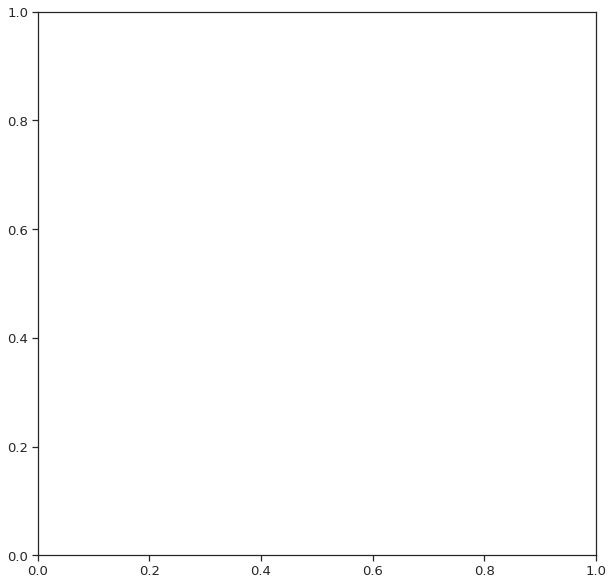

In [85]:
import seaborn as sns
from matplotlib import pyplot as plt
df = pd.DataFrame({
    'Período': ['2º 2017', '1º/2018', '2º/2018', '1º/2019', 'Total_CPFs'],
    'Comercial': c,
    'Logística': l,
    'Financeiro': f,
    'Pessoas': p
})


sns.set(style='ticks', context='notebook', font_scale=1.2)
fig, ax1 = plt.subplots(figsize=(10, 10))
tidy = df.melt(id_vars='Período').rename(columns=str.title)
sns.barplot(x='Período', y='Value', hue='Variable', palette="rocket",
            data=tidy, ax=ax1, capsize=.1)  # estimator=lambda x: sum(x==0)*100.0/len(x)
sns.despine(fig, top=True, right=True)
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

matplotlib.rc_file_defaults()
ax1 = sns.set_style(style=None, rc=None)

fig, ax1 = plt.subplots(figsize=(12, 6))

sns.lineplot(data=df['y_var_1'], marker='o', sort=False, ax=ax1)
ax2 = ax1.twinx()

sns.barplot(data=df, x='x_var', y='y_var_2', alpha=0.5, ax=ax2)


In [ ]:
comercial.count(axis=1)
logistica.count(axis=1)
financeiro.count(axis=1)
pessoas.count(axis=1)

In [73]:
from statistics import median
date_list = ['performance_1s_2019', 'performance_2s_2017', 'performance_2s_2018', 'performance_1s_2018']
setor_list_good = [financeiro, pessoas]

def fill_median(setor):
    for i in date_list:
        mediana_setor = median(setor[i])
        setor.fillna(mediana_setor, inplace = True)

for i in setor_list_good:
    fill_median(i)

/home/ggnicolau/miniconda3/envs/jupyter-1/lib/python3.10/site-packages/pandas/core/frame.py:5176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [57]:
pessoas

,CPF,Performance 1º/2019,Performance 2º/2018,Performance 1º/2018,Performance 2º 2017,Área
4,652.134.809-42,1.0,2.0,1.0,3.0,Pessoas
6,304.915.286-98,NaN,NaN,NaN,3.0,Pessoas
8,432.950.186-42,3.0,2.0,3.0,2.0,Pessoas
10,129.540.376-52,NaN,NaN,3.0,1.0,Pessoas
12,435.082.961-13,1.0,2.0,2.0,2.0,Pessoas
...,...,...,...,...,...,...
363,743.128.569-82,2.0,2.0,3.0,NaN,Pessoas
364,192.437.056-52,2.0,2.0,3.0,NaN,Pessoas
366,130.489.756-75,2.0,2.0,3.0,NaN,Pessoas
373,407.528.691-67,2.0,2.0,3.0,NaN,Pessoas


In [61]:
pessoas.apply(lambda x: [1, 2], axis=1)

AssertionError: 

In [26]:
mediana_financeiro = median(financeiro['performance_1s_2019'])
financeiro = financeiro.fillna(mediana_financeiro)

In [12]:
comercial_date_list_good = ['performance_1s_2019',
                            'performance_2s_2018', 'performance_1s_2018']
logistica_date_list_good = ['performance_1s_2019', 'performance_2s_2018']

for i in comercial_date_list_good:
    mediana_comercial = median(
        comercial[i])
    comercial = comercial.fillna(mediana_comercial)

for i in logistica_date_list_good:
    mediana_logistica = median(
        logistica[i])
    logistica = logistica.fillna(mediana_logistica)

TypeError: '<' not supported between instances of 'str' and 'float'

In [74]:
display(print('COMERCIAL:'))
display(missing_zero_values_table(comercial))
display(print('LOGISTICA:'))
display(missing_zero_values_table(logistica))
display(print('FINANCEIRO:'))
display(missing_zero_values_table(financeiro))
display(print('PESSOAS:'))
display(missing_zero_values_table(pessoas))


COMERCIAL:


None

Your selected dataframe has 6 columns and 591 Rows.
There are 4 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
Performance 2º 2017,0,528,89.3,528,89.3,float64
Performance 1º/2018,0,227,38.4,227,38.4,float64
Performance 1º/2019,0,14,2.4,14,2.4,float64
Performance 2º/2018,0,8,1.4,8,1.4,float64


LOGISTICA:


None

Your selected dataframe has 6 columns and 240 Rows.
There are 4 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
Performance 2º 2017,0,171,71.2,171,71.2,float64
Performance 1º/2018,0,167,69.6,167,69.6,float64
Performance 1º/2019,0,9,3.8,9,3.8,float64
Performance 2º/2018,0,4,1.7,4,1.7,float64


FINANCEIRO:


None

Your selected dataframe has 6 columns and 84 Rows.
There are 0 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type


PESSOAS:


None

Your selected dataframe has 6 columns and 72 Rows.
There are 0 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type


# Score per Area

In [3]:
df_score_area = df_scores.merge(df_area, on='CPF', how='left')
df_score_area.columns

Index(['Nome', 'Sobrenome', 'E-mail', 'CPF', 'Match', 'Potencial Bruto',
       'Raciocínio', 'Social', 'Motivacional', 'Cultura pontuação',
       'Cultura classificação', 'atributo-Capacidade analítica',
       'atributo-Pensamento conceitual', 'atributo-Reflexão',
       'atributo-Pensamento criativo', 'atributo-Planejamento e organização',
       'atributo-Comunicação', 'atributo-Consideração pelos outros',
       'atributo-Influência', 'atributo-Sociabilidade', 'atributo-Facilitação',
       'atributo-Flexibilidade', 'atributo-Estabilidade emocional',
       'atributo-Ambição', 'atributo-Iniciativa', 'atributo-Assertividade',
       'atributo-Tomada de riscos', 'perfil-Capacidade analítica',
       'perfil-Pensamento conceitual', 'perfil-Reflexão',
       'perfil-Pensamento criativo', 'perfil-Planejamento e organização',
       'perfil-Comunicação', 'perfil-Consideração pelos outros',
       'perfil-Influência', 'perfil-Sociabilidade', 'perfil-Facilitação',
       'perfil-Flexibil

In [4]:
display(df_score_area['Match'].isna().sum())
display(df_score_area.shape)

4281

(4281, 59)

In [5]:
df_score_area = df_score_area.drop(['Nome', 'Sobrenome', 'E-mail', 'URL Raciocínio', 'URL Cultura', 'URL Social', 'URL Perfil', 'URL Motivacional', 'Início - Raciocínio', 'Início - Cultura', 'Início - Social',
           'Início - Motivacional', 'Início - Perfil'], axis=1)
df_score_area = df_score_area.drop('Match', axis=1)
df_score_area


,CPF,Potencial Bruto,Raciocínio,Social,Motivacional,Cultura pontuação,Cultura classificação,atributo-Capacidade analítica,atributo-Pensamento conceitual,atributo-Reflexão,...,perfil-Ambição,perfil-Iniciativa,perfil-Assertividade,perfil-Tomada de riscos,Fim - Raciocínio,Fim - Cultura,Fim - Social,Fim - Motivacional,Fim - Perfil,Área
0,582.975.481-98,15.02,10.89,8.50,30.78,61.62,Médio-alto,9.02,5.61,10.72,...,55.59,46.50,32.86,23.77,2019-09-02 18:47:40.230133+00:00,2019-09-02 18:45:58.610119+00:00,2019-09-02 18:47:52.188799+00:00,2017-10-02 21:37:55.440674+00:00,2019-09-02 18:49:55.512234+00:00,Comercial
1,618.492.035-98,41.18,27.31,31.07,77.53,71.92,Alto,15.53,21.28,17.23,...,51.05,55.59,60.14,64.68,2017-03-11 01:36:09.837171+00:00,2017-03-11 04:44:18.962437+00:00,2017-03-11 05:22:52.602643+00:00,2017-03-11 05:06:41.817962+00:00,2017-03-11 04:52:43.434487+00:00,Logística
2,376.104.598-11,56.78,71.39,47.53,46.36,49.10,Médio,81.20,72.18,41.49,...,93.16,28.32,19.23,41.95,2017-04-09 12:35:40.925275+00:00,2017-04-09 12:43:47.091106+00:00,2017-04-09 13:14:37.327611+00:00,2017-04-09 13:05:01.111152+00:00,2017-04-09 12:52:19.887744+00:00,Comercial
3,056.378.194-75,NaN,63.01,NaN,NaN,22.87,Muito baixo,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2016-05-18 22:28:54.132025+00:00,2016-05-18 22:57:58.911020+00:00,NaN,NaN,NaN,Operações
4,235.406.789-56,50.96,79.87,21.19,46.36,41.31,Médio-baixo,85.44,90.55,82.03,...,64.68,46.50,37.41,46.50,2016-09-12 02:24:49.906533+00:00,2016-09-12 02:30:27.135027+00:00,2016-10-01 15:21:30.723428+00:00,2016-09-26 02:08:20.131566+00:00,2016-09-26 02:17:52.166309+00:00,Operações
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4276,983.056.712-59,43.69,53.80,37.65,35.97,16.63,Muito baixo,64.81,61.40,51.17,...,69.23,37.41,37.41,37.41,2017-04-07 23:33:32.070933+00:00,2017-04-07 23:43:28.945227+00:00,2017-04-08 00:17:50.189688+00:00,2017-04-08 00:04:43.852030+00:00,2017-04-07 23:52:05.350139+00:00,Logística
4277,912.036.847-11,NaN,53.97,NaN,NaN,16.27,Muito baixo,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2016-05-25 14:55:32.469363+00:00,2016-05-25 15:00:26.087092+00:00,NaN,NaN,NaN,Logística
4278,237.195.086-68,NaN,81.02,NaN,NaN,61.85,Médio-alto,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2016-05-24 23:53:10.744878+00:00,2016-05-25 00:05:38.299442+00:00,NaN,NaN,NaN,Operações
4279,397.684.512-46,51.15,54.42,50.82,46.36,60.69,Médio-alto,44.98,55.21,68.84,...,78.32,73.77,46.50,28.32,2017-09-20 20:07:53.884740+00:00,2016-05-24 20:36:31.064964+00:00,2016-10-02 21:23:14.513370+00:00,2016-09-27 18:39:48.192841+00:00,2016-09-27 18:26:32.859742+00:00,Logística


In [ ]:
c = b.drop(['B', 'C'], axis=1)
selected_rows = df[df.isnull().all(axis=1)]